#  **Project Overview: Garment Worker Productivity Prediction**


This project aims to analyze and predict garment worker productivity using machine learning techniques.
By leveraging a dataset containing various production-related attributes, such as targeted productivity,
overtime, incentives, and worker count, we seek to uncover patterns and relationships that influence efficiency.
The ultimate goal is to develop a predictive model that accurately estimates productivity while identifying
the key factors that impact performance in the garment manufacturing industry.


# **Project Goals and Workflow**

1. **Exploratory Data Analysis (EDA):**  
   - Visualize feature distributions using histograms, box plots, and pair plots.  

   - Identify correlations between variables using a heatmap.  
   - Detect potential outliers and anomalies in productivity data.  
   - Analyze trends over time by incorporating temporal features.  

2. **Feature Engineering and Selection:**  
   - Encode categorical variables such as department, quarter, and day of the week.  

   - Create lag features to capture productivity trends over time.  
   - Generate temporal features like month, season, and week of the year for better trend analysis.  

3. **Data Preprocessing:**  
   - Handle missing values and remove duplicate records.  

   - Normalize and scale numerical features for improved model performance.  
   - Split the dataset into training and testing sets for model evaluation.  

4. **Model Development and Evaluation:**  
   - Implement multiple regression models, including:  
     1. **Linear Regression**  

     2. **Polynomial Regression**  
     3. **Decision Tree Regressor**  
     4. **Random Forest Regressor**  
     5. **K-Nearest Neighbors (KNN) Regressor**  
     6. **Multi-Layer Perceptron (MLP) Regressor**  
   - Optimize hyperparameters using **RandomizedSearchCV** for improved performance.  
   - Evaluate models using metrics such as **Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score**.  

5. **Insights and Interpretability:**  
   - Analyze feature importance to determine key drivers of worker productivity.  

   - Evaluate how lag features and temporal factors influence prediction accuracy.  
   - Compare model performance to select the best approach for productivity estimation.  

6. **Final Model Selection and Application:**  
   - Choose the best-performing model based on evaluation metrics and interpretability.  

   - Ensure the model generalizes well to new data for reliable productivity estimation.  
   - Prepare the model for potential integration into workforce management systems.  


# **Dataset Specification**


In [ ]:
! kaggle datasets download ishadss/productivity-prediction-of-garment-employees

Dataset URL: https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees
License(s): copyright-authors
  0% 0.00/16.1k [00:00<?, ?B/s]
100% 16.1k/16.1k [00:00<00:00, 20.1MB/s]


In [ ]:
! unzip /content/productivity-prediction-of-garment-employees.zip

Archive:  /content/productivity-prediction-of-garment-employees.zip
  inflating: garments_worker_productivity.csv  


The dataset contains multiple features, each providing key information about production-related factors influencing
garment worker productivity. It includes numerical, categorical, and temporal variables that help in predicting
productivity levels. Below is a detailed breakdown of the dataset:

1. **Date**  
   - **Type**: DateTime  

   - **Description**: Represents the recorded date of production.  
   - **Relevance**: Used to extract temporal features like month, day of the week, and season for trend analysis.  

2. **Quarter**  
   - **Type**: Categorical (Encoded)

   - **Description**: Represents the quarter of the year (Q1, Q2, Q3, or Q4).  
   - **Relevance**: Helps analyze seasonal variations in productivity.  

3. **Department**  
   - **Type**: Categorical (Encoded)  

   - **Description**: Specifies whether the worker belongs to the sewing or finishing department.  
   - **Relevance**: Different departments may have varying productivity levels.  

4. **Day**  
   - **Type**: Categorical (Encoded)  

   - **Description**: The day of the week when productivity was recorded.  
   - **Relevance**: Helps in identifying productivity patterns based on weekdays and weekends.  

5. **Targeted Productivity**  
   - **Type**: Float  

   - **Description**: The expected productivity level set as a target.  
   - **Relevance**: Used as a benchmark to evaluate actual productivity.  

6. **SMV (Standard Minute Value)**  
   - **Type**: Float  

   - **Description**: The time required (in minutes) to complete a specific task.  
   - **Relevance**: A key factor in determining production efficiency.  

7. **Overtime**  
   - **Type**: Integer  

   - **Description**: The total overtime (in minutes) logged by workers.  
   - **Relevance**: Indicates the impact of additional working hours on productivity.  

8. **Incentive**  
   - **Type**: Integer  

   - **Description**: Monetary incentives provided to workers.  
   - **Relevance**: Helps analyze the effect of financial motivation on productivity.  

9. **Number of Workers**  
   - **Type**: Integer  

   - **Description**: The total number of workers in a given production unit.  
   - **Relevance**: Workforce size can influence overall productivity levels.  

10. **Number of Style Changes**  
   - **Type**: Integer  

   - **Description**: The number of times the garment style was changed during production.  
   - **Relevance**: Frequent style changes may disrupt efficiency and reduce productivity.  

11. **Actual Productivity (Target Variable)**  
   - **Type**: Float  

   - **Description**: The actual recorded productivity level achieved.  
   - **Relevance**: The target variable for prediction, representing worker performance based on given conditions.  


# **Import Libraries**

**Explanation of Libraries :**

The code snippet in the image imports the following essential Python libraries commonly used for data analysis and visualization:

**pandas** (pd) :  A powerful library for data manipulation and analysis, especially for handling structured data (e.g., DataFrames).

**numpy** (np) :  Used for numerical computations, especially for handling arrays and performing mathematical operations efficiently.

**matplotlib.pyplot** (plt) :  A popular plotting library for creating static, animated, and interactive visualizations.

**seaborn** (sns) : Built on top of matplotlib, seaborn makes it easier to create more attractive and informative statistical plots.

These libraries are often used together for data science tasks, such as data visualization, exploration, and manipulation.

---

This code suppresses warning messages in the program by ignoring them.

- import warnings: Imports the warnings module, which allows control over warning messages.

- warnings.filterwarnings('ignore'): Tells Python to ignore all warning messages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Data Initialization**


The data initialization phase is a crucial starting point in any machine learning pipeline. This step involves loading, inspecting, and preparing the dataset for further analysis. In this project, we initialize the dataset with the following steps:


**1. Data Loading:**

- We use the pandas library to load the Garment Worker Productivity dataset from a CSV file.

- **Purpose:** To read the raw dataset into a pandas DataFrame for easy manipulation and analysis.

- **Dataset Details:** The dataset contains features such as date, department, overtime, incentives,
  and the target variable, actual productivity.


In [ ]:
data = pd.read_csv("/content/garments_worker_productivity.csv")
df = pd.DataFrame(data)
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


**2.Descriptive Statistics :**


- Purpose:

 - The df.describe() method generates a statistical summary of the numerical columns in the DataFrame, providing insights into data distribution and variability.

- Key Outputs:

 - Count: Number of non-missing values in each column.

 - Mean: Average value of the column.

 - Standard Deviation (std): Measure of data spread around the mean.

 - Minimum and Maximum (min/max): Range of values in the column.

 - Percentiles (25%, 50%, 75%): Show the data distribution at key thresholds.

- Key Insights:

  - Helps identify the central tendency, variability, and spread of numerical features.

  - Reveals potential anomalies, such as extremely high or low values (outliers).
Provides a quick overview of data completeness (via count) and variability.

In [ ]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


**3. Dataset Structure:**

- We use .info() to check the number of entries, column data types, and missing values.

- **Purpose:** Understanding the dataset structure ensures appropriate preprocessing steps.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

**4. Handling Duplicates:**
- We remove duplicate rows, if any, using .drop_duplicates().

- **Purpose:** Eliminating duplicates prevents redundant data from affecting model performance.


In [ ]:
df.drop_duplicates()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


**5. Checking for Missing Values:**
- We use .isnull().sum() to identify missing values in each column.

- **Purpose:** Missing values can impact model performance, so they need to be handled appropriately.


In [ ]:
df.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


**6. Dropping Unnecessary Columns:**
- We remove columns such as 'wip', 'idle_men', and 'idle_time', as they may not contribute significantly to prediction.

- **Purpose:** Reducing irrelevant features helps improve model efficiency.

---


**Why I removed them :**

- We remove the columns 'wip', 'idle_men', and 'idle_time' from the dataset.
  
  - **'wip' (Work in Progress):** This column is removed because it contains a significant number of missing (NaN) values,
  and there is no clear information about its exact meaning or how it relates to productivity. Without proper context,
  retaining 'wip' could introduce noise into the model rather than provide valuable insights.
  
  - **'idle_men':** Represents the number of workers who are idle at any given time. This feature might correlate with
  operational inefficiencies, but it is likely redundant with other features in the dataset that already capture productivity
  metrics. Removing it helps to reduce multicollinearity and streamline the dataset.

  - **'idle_time':** Indicates the amount of time workers spend idly. Similar to 'idle_men', this feature may overlap with
  other variables that reflect the production process, and thus, it is removed to avoid redundancy.
  
- **Purpose:** Dropping these columns aims to simplify the dataset and focus the analysis on more relevant features that
  directly influence productivity. By eliminating columns with unclear or redundant information, we can improve model
  interpretability and efficiency.
"""


In [ ]:
df.drop(['wip', 'idle_men', 'idle_time'], axis=1, inplace=True)

# **Handling Non Numeric Features**

The LabelEncoder class from the sklearn.preprocessing module is used to convert categorical data into numerical form. It is particularly helpful when machine learning algorithms require input features to be numerical, as most models cannot process raw categorical data directly.

---

**Purpose:**

- Convert non-numerical labels (categories) into integers.

- Ensure consistent mapping of categorical values to numerical representations.

---

**How it Works:**

1. Each unique category in a column is assigned a unique integer value.

2. This mapping is stored internally in the LabelEncoder object, ensuring consistency during transformations.

3. The resulting numerical values can then be used as input for machine learning algorithms.

---

**Key Functions:**

- fit: Identifies the unique categories in the data and creates a mapping from category to integer.

- transform: Converts the original categorical data into numerical labels using the created mapping.

- fit_transform: Combines the fit and transform steps into one for convenience.

- inverse_transform: Converts the numerical labels back into their original categorical values.

---

**When to Use:**

- When the categorical data has no intrinsic order, and a simple numerical  representation is sufficient.

- When you want a lightweight encoding for nominal features.



In [ ]:
from sklearn.preprocessing import LabelEncoder

This line initializes a LabelEncoder object, which will be used to transform categorical data into numerical format.

In [ ]:
encoder = LabelEncoder()

This block of code applies label encoding to multiple categorical columns in the DataFrame df. Each column is transformed into numerical format, where each unique category is assigned a unique integer value.

**Explanation:**

- encoder.fit_transform(column):

 - Fits the LabelEncoder to the specific column, learning the unique categories.

 - Transforms the categories into integers based on the learned mapping.

**Purpose:**

- Converts categorical data into numerical format, making it suitable for machine learning algorithms.

- Ensures consistent encoding for each column.

**Columns Transformed:**

- Manufacturer, Model, Category, Leather interior, Fuel type, Gear box type, Drive wheels, Doors, Wheel, Color, Engine volume

 - Each of these categorical columns is encoded into integers.

---


**Why This is Done:**

- Machine learning models generally require numerical input; categorical data cannot be processed directly.

- Label encoding helps to prepare categorical data for use in predictive modeling.

In [ ]:
df['quarter'] = encoder.fit_transform(df['quarter'])
df['department'] = encoder.fit_transform(df['department'])
df['day'] = encoder.fit_transform(df['day'])

**Converting 'date' to DateTime Format**

- We use pd.to_datetime(df['date']) to convert the 'date' column from a string format to a pandas DateTime object.  

### **Why is this necessary?**
1. **Facilitates Time-Based Analysis:** Converting to DateTime allows us to extract useful time-based features such as
   the day of the week, month, quarter, and season, which can help in understanding productivity trends.  

2. **Improves Data Handling:** Pandas provides powerful DateTime functions, making it easier to perform operations like
   sorting by date, filtering data by time range, and calculating differences between dates.  

3. **Ensures Consistency:** If the 'date' column is in string format, it might contain inconsistent formats, leading
   to errors in analysis. Converting it to DateTime ensures uniformity across all records.  

### **Impact on the Dataset:**
- Once converted, we can efficiently use time-series techniques, resampling methods, and visualization tools to gain
  deeper insights into how productivity changes over time.

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   int64         
 2   department             1197 non-null   int64         
 3   day                    1197 non-null   int64         
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   over_time              1197 non-null   int64         
 8   incentive              1197 non-null   int64         
 9   no_of_style_change     1197 non-null   int64         
 10  no_of_workers          1197 non-null   float64       
 11  actual_productivity    1197 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 112.3

# **Pair Plot**

A pair plot is a matrix of scatter plots that provides a visual overview of the relationships between multiple variables in a dataset. Each scatter plot shows the relationship between two variables, while the diagonal typically displays histograms (or kernel density plots) for the distribution of each individual variable. Pair plots are especially useful in exploratory data analysis for understanding potential correlations, distributions, and outliers within multivariate data.

This visualization is particularly useful for:

**Detecting Correlations:** Identifies linear or non-linear relationships between numerical features.

**Spotting Clusters:** Helps observe if certain groups emerge, which can relate to target classes.

**Finding Outliers:** Scatterplots can highlight unusual data points.

F**eature Selection:** Helps decide which features have strong pairwise relationships and which may be redundant.

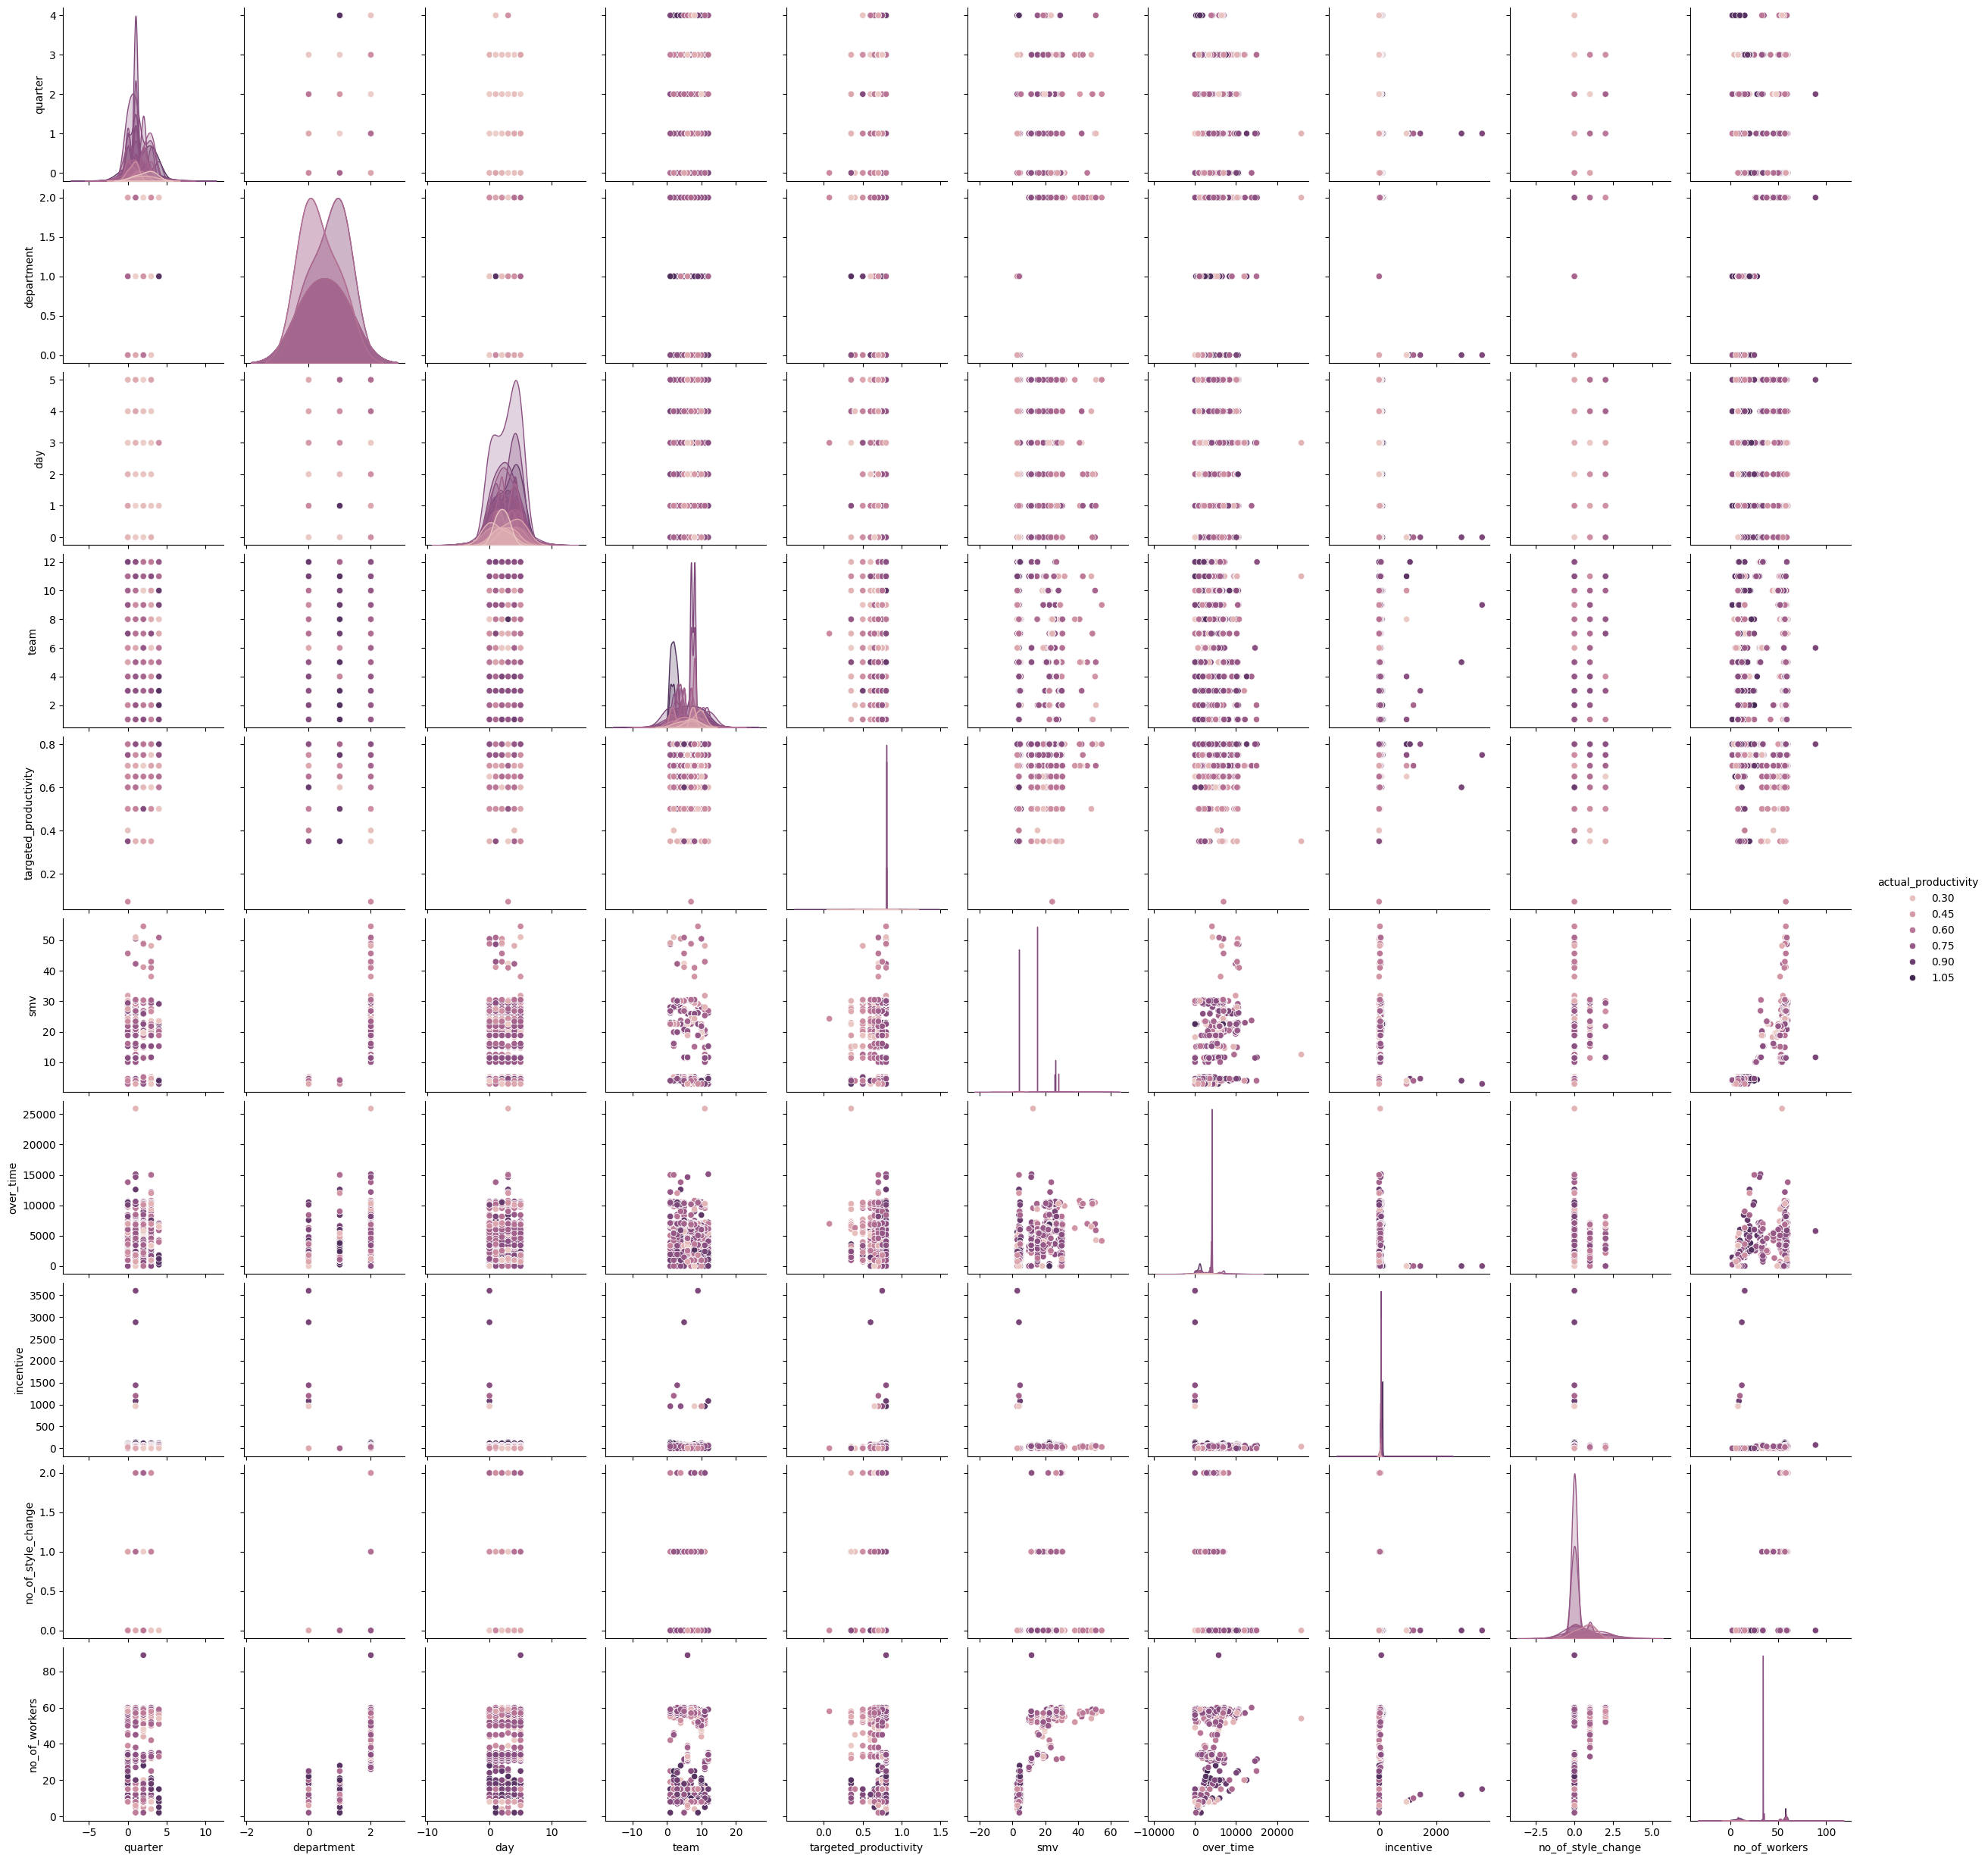

In [ ]:
sns.pairplot(df, hue='actual_productivity')
plt.show()

## **Pairplot Analysis**

The pairplot visualizes relationships between numerical features while also displaying their distributions.
Below is a detailed analysis of key observations:

---

##**1. Diagonal: Feature Distributions**
- The diagonal elements represent **Kernel Density Estimations (KDEs)**, showing the distribution of each numerical feature.

- **Observations:**
  - `actual_productivity`: Skewed towards lower values, indicating that high productivity levels are less common.

  - `targeted_productivity`: Shows distinct peaks, suggesting predefined production targets.
  - `over_time` and `incentive`: Highly skewed, implying that only a subset of workers receive significant overtime or incentives.
  - `smv (Standard Minute Value)`: Concentrated distribution, meaning most tasks have similar time requirements.

---

## **2. Bivariate Relationships (Scatter Plots)**
Each subplot (off-diagonal) visualizes the relationship between two features. Here are key insights:

### **(a) Actual Productivity vs. Other Features**
- **`actual_productivity` vs. `targeted_productivity`**
  - A **strong positive correlation** is visible; higher targets generally lead to higher actual productivity.

  - Some deviations indicate that actual performance does not always meet targets.

- **`actual_productivity` vs. `over_time`**
  - Weak correlation observed—overtime alone does not significantly boost productivity.

  - Suggests that increasing working hours is not always an effective strategy for improving efficiency.

- **`actual_productivity` vs. `incentive`**
  - No clear linear relationship; however, higher incentives may lead to slightly better productivity in some cases.

- **`actual_productivity` vs. `no_of_workers`**
  - A **moderate positive trend** is visible, meaning larger teams tend to have slightly higher productivity, but the effect is limited.

### **(b) Relationship Between Work-Related Features**
- **`over_time` vs. `incentive`**
  - Clear clusters exist, possibly due to different policies on how overtime is rewarded with incentives.

  - Some workers receive high incentives without significant overtime, while others work longer hours without additional rewards.

- **`smv` vs. `targeted_productivity`**
  - Somewhat inverse relationship: tasks with lower SMV tend to have higher targeted productivity, indicating that simpler tasks have higher efficiency goals.

- **`smv` vs. `no_of_workers`**
  - Higher `smv` tasks (more time-consuming tasks) often have larger teams, confirming that complex tasks require more workers.

---

## **3. Feature Relationships Based on Productivity Levels**
- The **hue (`actual_productivity`)** helps identify how feature interactions vary with productivity levels:
  - **Low-productivity cases** (darker points) are scattered across different feature combinations, showing variability in factors influencing inefficiency.

  - **High-productivity cases** (lighter points) are concentrated in specific regions, indicating that certain conditions (e.g., balanced `smv`, moderate `no_of_workers`, optimal `targeted_productivity`) contribute to better performance.

---

## **4. Key Takeaways**
- Targeted productivity strongly influences actual productivity.  

- Overtime and incentives alone do not significantly impact productivity.  

- Larger teams slightly enhance productivity, but efficiency depends on task complexity (SMV).

- Task duration (SMV) and team size correlate, confirming that complex tasks require more workers.

- Distinct incentive-overtime clusters suggest different compensation strategies.

---

## **Conclusion**
This pairplot provides valuable insights into worker efficiency and production trends.
These observations can help guide feature selection for predictive modeling, enabling factories to optimize
workforce management and improve productivity.


# **Hist Plot**

A histplot (histogram plot) is a visualization that shows the distribution of a single variable by dividing data into bins and displaying the count of values in each bin as bars. It’s useful for understanding the spread, skewness, modality (e.g., unimodal, bimodal), and presence of outliers in data. In machine learning and data analysis, histograms help identify patterns in the data, which can inform preprocessing steps like normalization, scaling, or transformation.

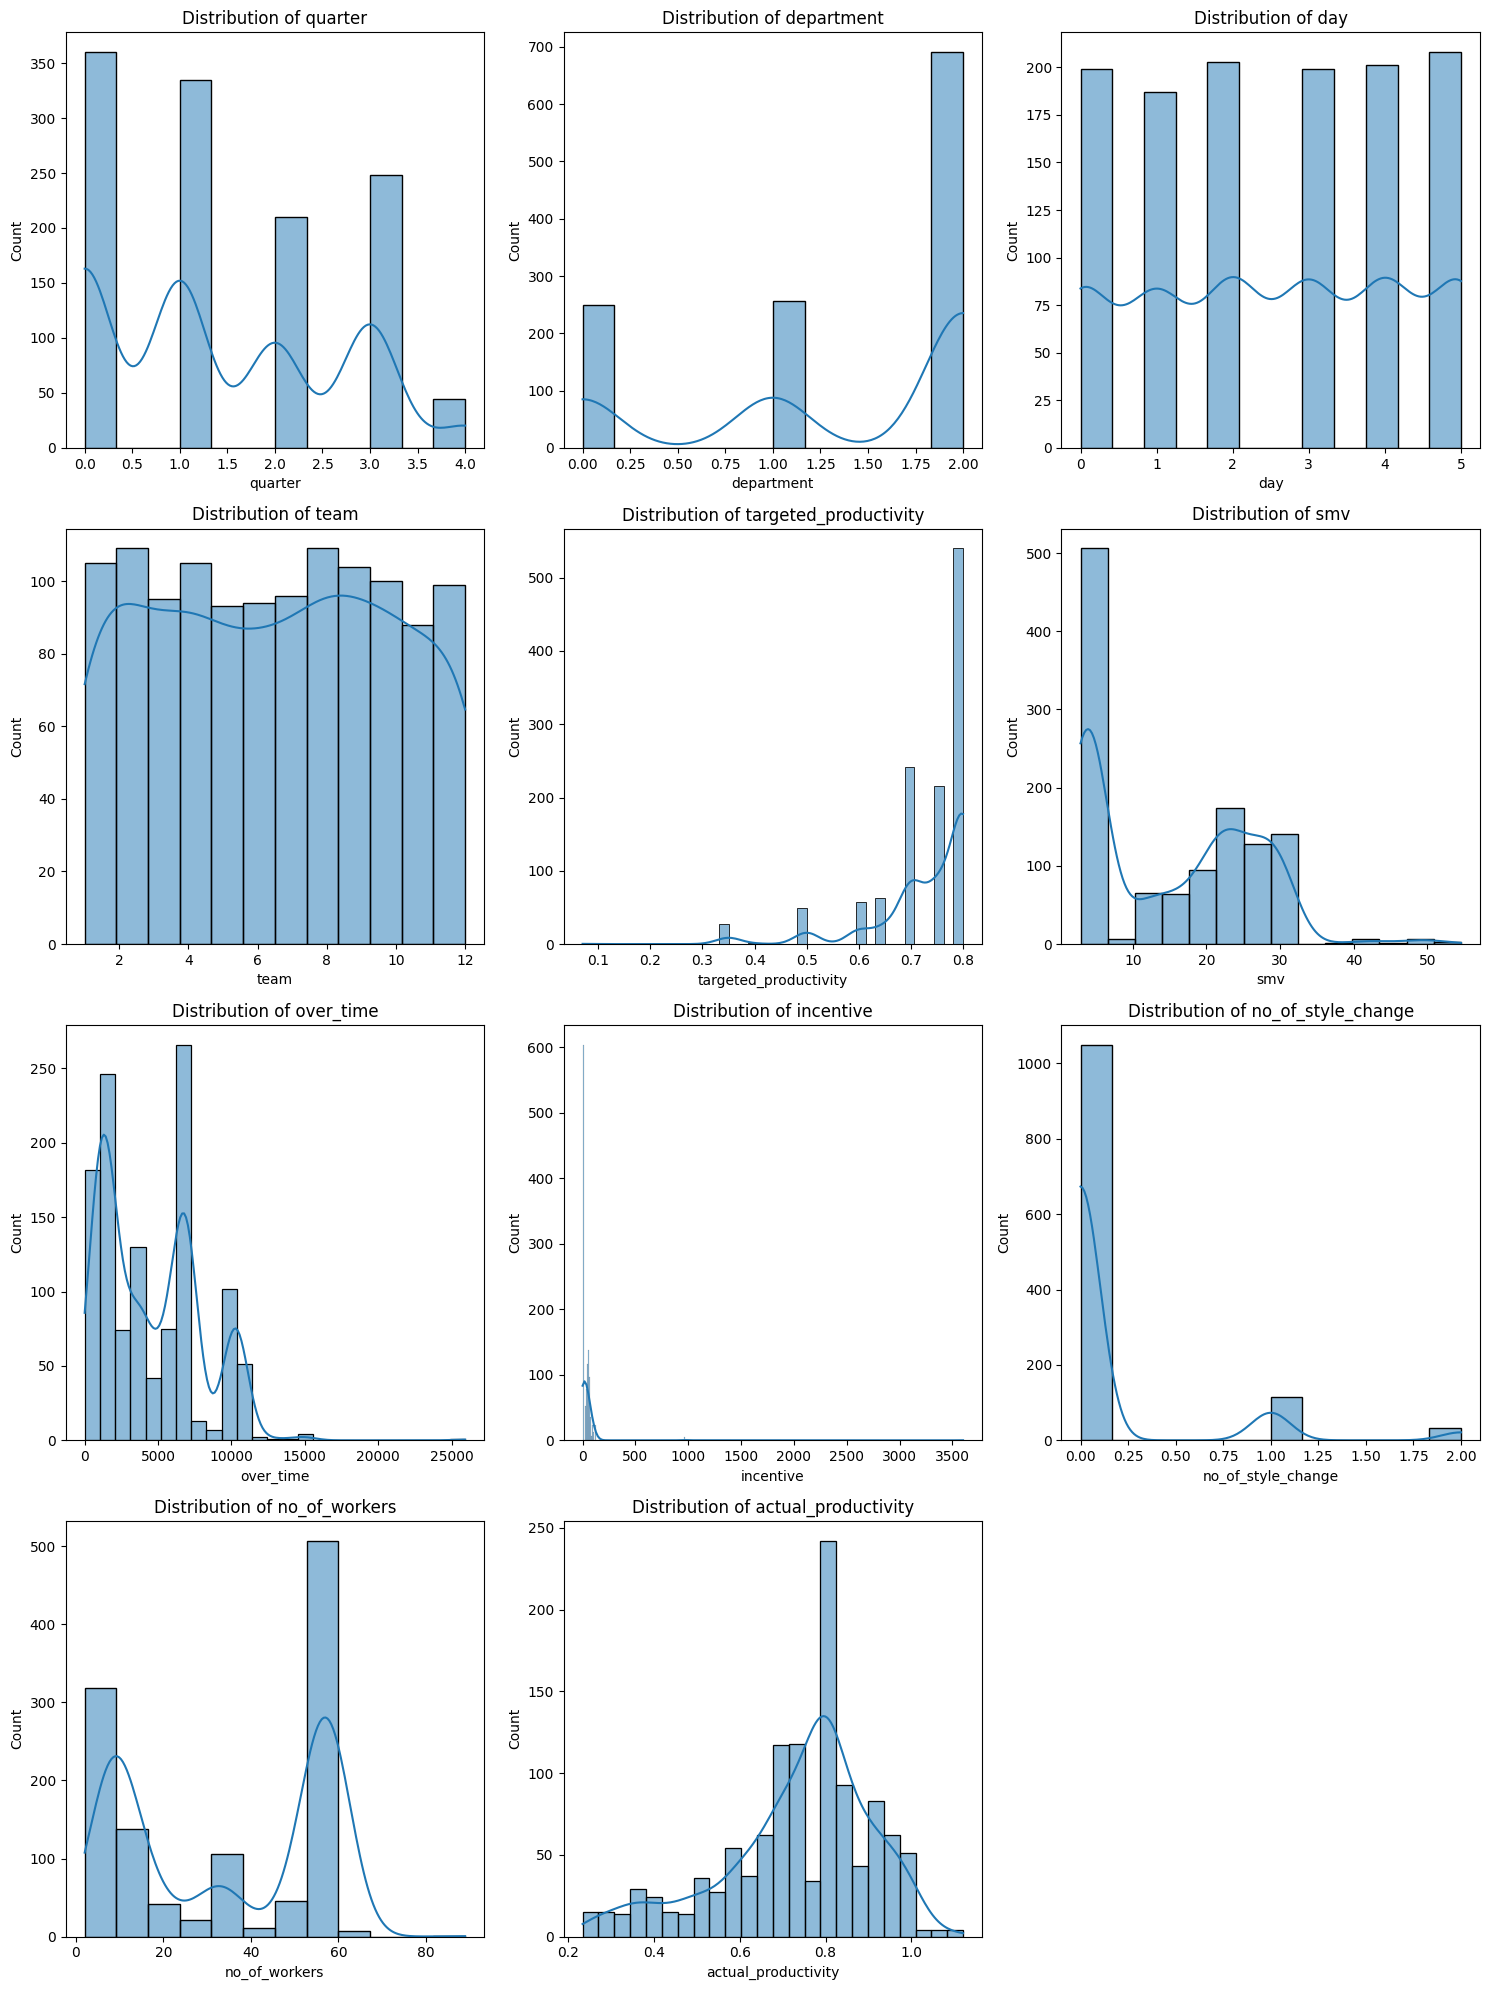

In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)


plt.tight_layout()
plt.savefig('numeric_columns_distribution.png')
plt.show()

## **Histogram Analysis:**

The histograms display the distribution of each numerical feature in the dataset. These visualizations help us
understand the spread, skewness, and potential outliers in the data. Below is a detailed analysis:

---

## **1. Categorical Feature Distributions**
- **`quarter`**: The dataset contains productivity data for different quarters, with some quarters having
  significantly more records. This could indicate seasonal trends in garment production.

- **`department`**: The dataset has three categories, with a notable concentration in one particular department.
- **`day`**: The productivity data is evenly distributed across different days of the week, suggesting that
  production is relatively consistent throughout the workweek.

---

## **2. Production-Related Features**
- **`team`**: The number of production teams appears uniformly distributed, indicating balanced workforce allocation.

- **`targeted_productivity`**: The distribution shows peaks at specific values, likely due to predefined
  target levels set by management.
- **`smv (Standard Minute Value)`**: The distribution is skewed, with most tasks requiring a lower SMV, while
  a few tasks demand significantly more time.

---

## **3. Work Conditions and Compensation**
- **`over_time`**: The distribution is highly right-skewed, meaning that while most workers have low or moderate
  overtime, some instances involve significantly higher overtime hours.

- **`incentive`**: The majority of workers receive little to no incentives, with only a few cases receiving high incentives.
- **`no_of_style_change`**: Most data points show minimal style changes, but there are occasional instances
  where multiple style changes occur, which might impact efficiency.

---

## **4. Workforce & Productivity**
- **`no_of_workers`**: The distribution is skewed, indicating that while most production units have a moderate
  number of workers, some units operate with either very few or very many workers.

- **`actual_productivity`**: The distribution is slightly right-skewed, meaning that while most workers achieve
  moderate productivity, fewer cases show extremely high productivity.

---

## **Key Takeaways**
- Targeted productivity values are predefined, leading to distinct peaks in the histogram.  

- Overtime and incentives are skewed, suggesting that only a subset of workers receive significant additional work or rewards.

- Most production tasks have low SMV values, meaning they require relatively less time to complete.

- Actual productivity follows a near-normal distribution, but with a slight right skew, indicating that extremely high productivity cases are rare.

- Most production units maintain a relatively stable workforce, but some operate with either very small or very large teams.  

---

## **Conclusion**
The histograms provide important insights into workforce allocation, production efficiency, and compensation trends.
These observations help in understanding which factors might influence worker productivity, aiding in the development
of predictive models for better workforce management.


# **Box Plot**

A box plot (or box-and-whisker plot) is a visualization used to display the distribution, spread, and skewness of data through quartiles. It highlights the median, interquartile range (IQR), and potential outliers for a variable.

**Median:** The central line in the box represents the median (50th percentile) of the data.

**IQR (Interquartile Range):** The box represents the middle 50% of the data, spanning from the first quartile (25th percentile) to the third quartile (75th percentile).

**Whiskers:** The lines (whiskers) extending from the box show the range within 1.5 times the IQR.

**Outliers:** Data points outside this range are plotted as individual points and considered potential outliers.

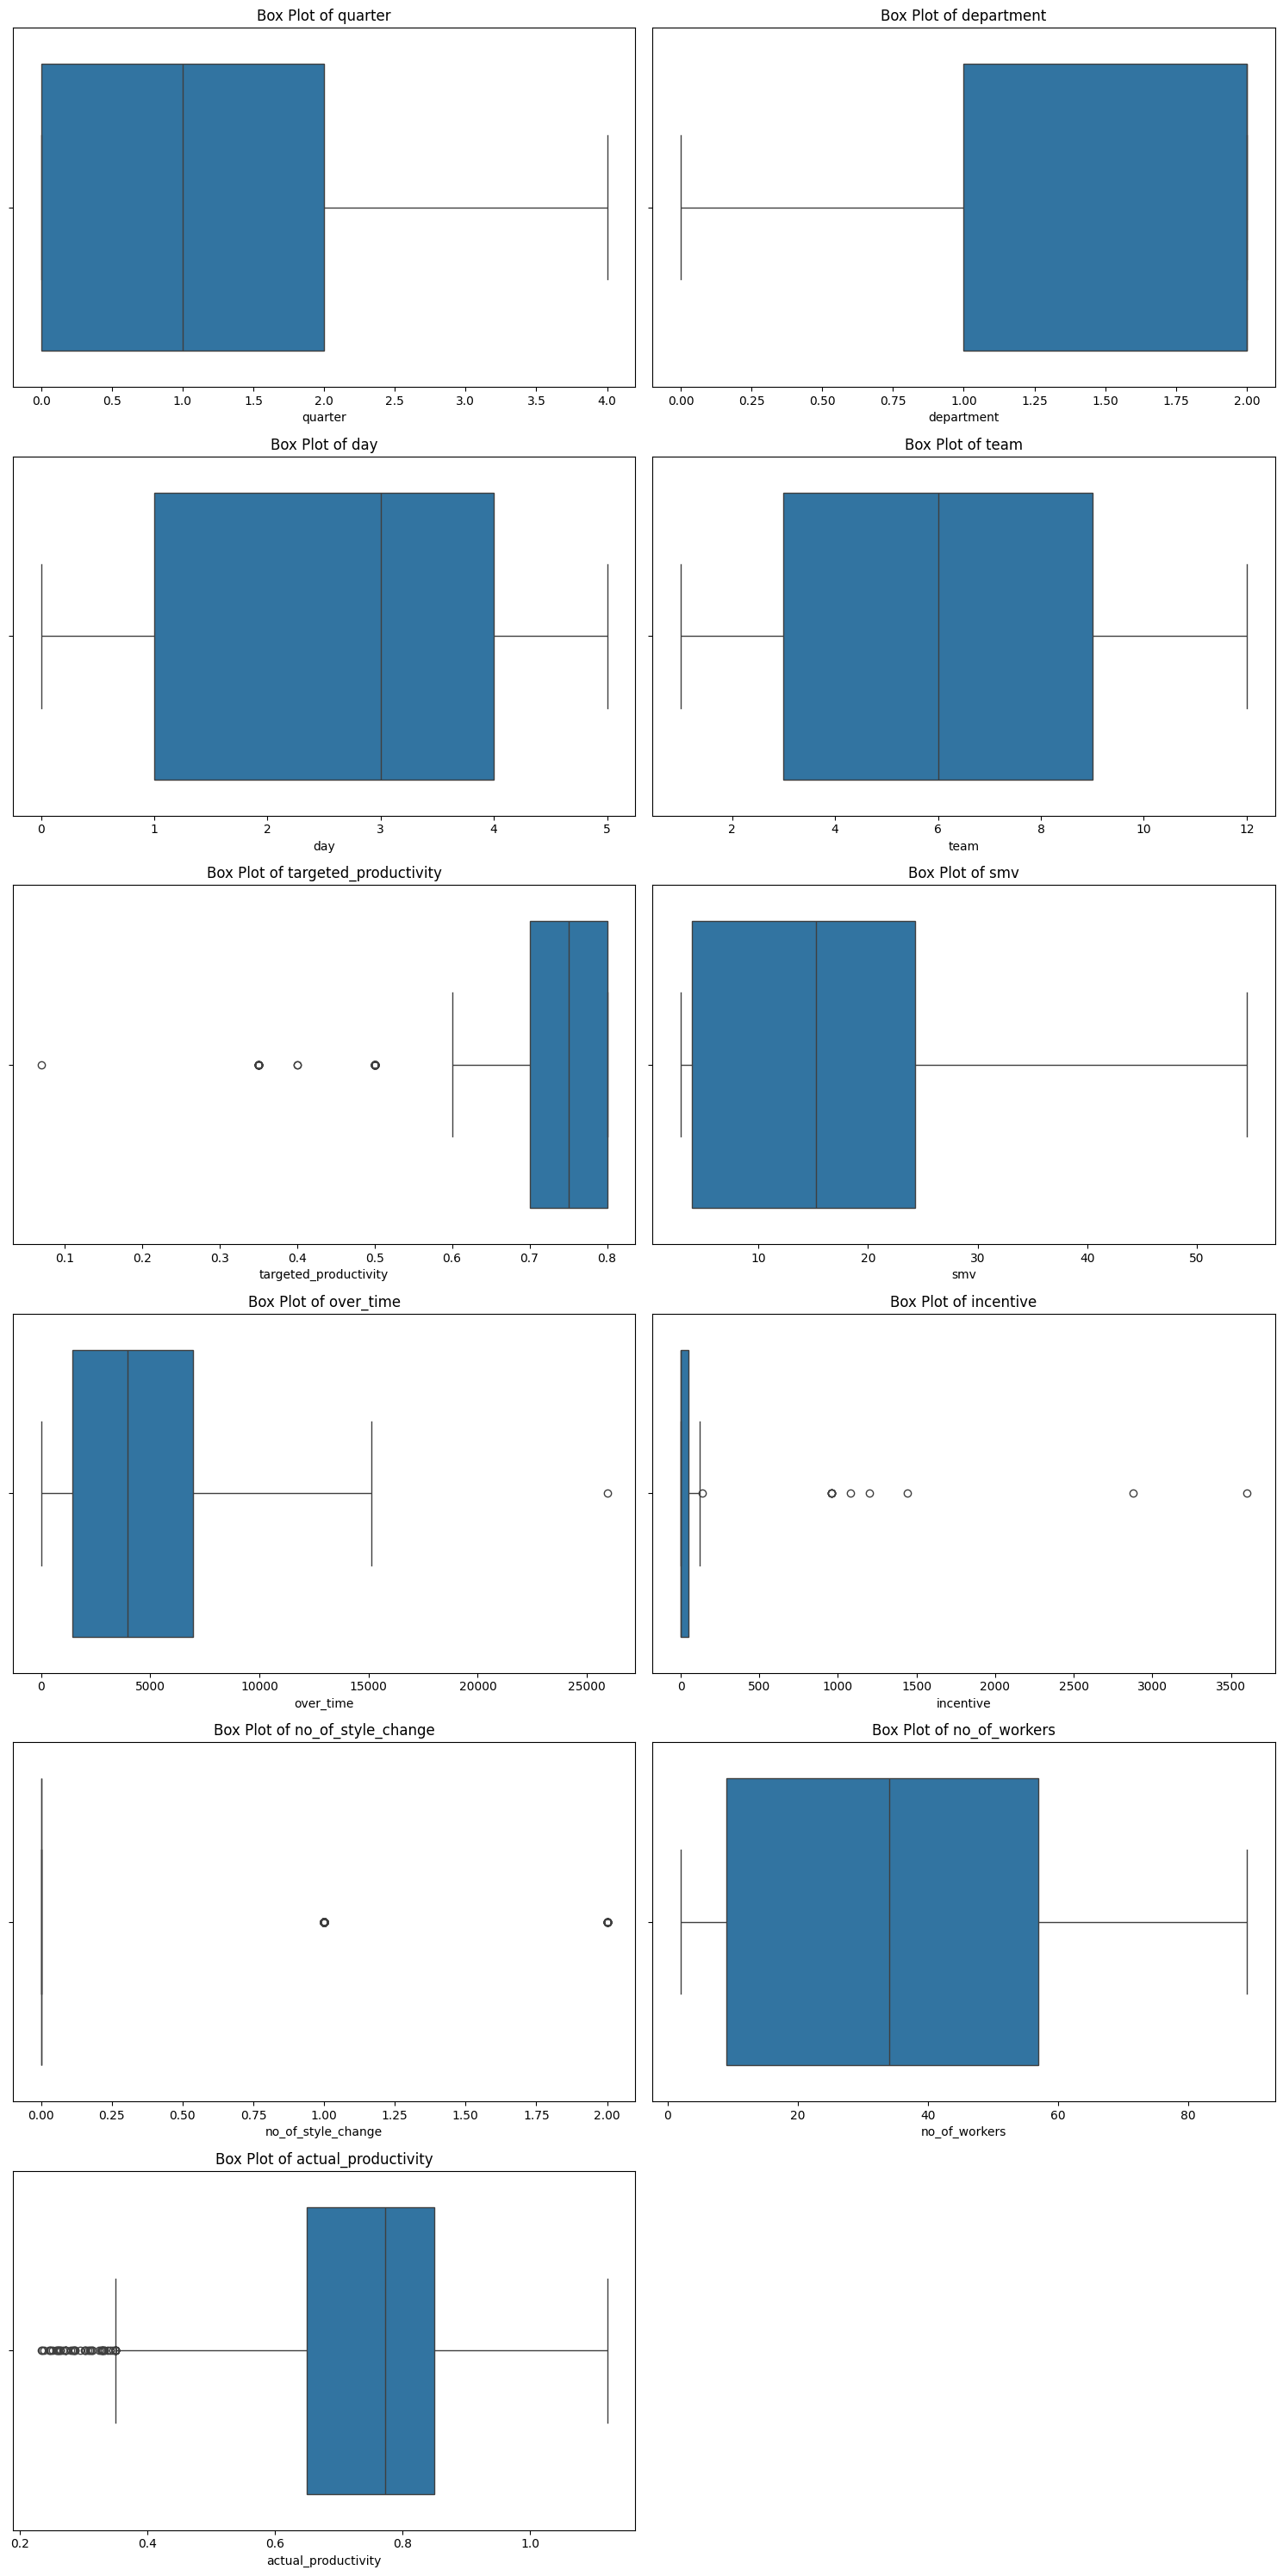

In [ ]:
n_cols = 2
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('numeric_columns_boxplots.png')
plt.show()

## **Boxplot Analysis:**

Boxplots provide insights into the distribution, spread, and presence of outliers in numerical features.
They help in understanding data variability and detecting potential anomalies. Below is a detailed analysis:

---

## **1. Categorical Feature Distributions**
- **`quarter`**: Evenly distributed without outliers, indicating balanced data collection across different quarters.

- **`department`**: The distribution suggests an uneven number of records per department, but no extreme values.
- **`day`**: The dataset contains data across all working days, showing no significant variations.

---

## **2. Production-Related Features**
- **`team`**: The distribution is uniform, showing no extreme outliers in the number of teams.

- **`targeted_productivity`**: Some outliers exist at lower values, possibly representing instances where the target was set abnormally low.
- **`smv (Standard Minute Value)`**: The range is wide, with high variation in task complexity but no extreme outliers.

---

## **3. Work Conditions and Compensation**
- **`over_time`**: The boxplot shows **significant outliers**, indicating that in some cases, extreme overtime hours were logged.

- **`incentive`**: Highly skewed, with several **outliers at higher values**, suggesting that only a small percentage of workers receive large incentives.
- **`no_of_style_change`**: Most values are concentrated at the lower end, but a few extreme cases indicate frequent style changes in certain instances.

---

## **4. Workforce & Productivity**
- **`no_of_workers`**: The range is wide, with no extreme anomalies, suggesting variations in workforce sizes across production units.

- **`actual_productivity`**: Slight skewness with a few **low-value outliers**, indicating instances where workers achieved much lower productivity than expected.

---

## **Key Takeaways**
- Outliers in `over_time` and `incentive` suggest that a small number of workers have extreme work conditions or financial rewards.

- `targeted_productivity` has some low-value outliers, which may indicate inconsistencies in setting targets.
- `actual_productivity` distribution suggests that most workers perform within an expected range, but a few struggle to meet targets.  
- `no_of_style_change` shows a mostly stable production flow, but occasional frequent style changes may disrupt efficiency.

---

## **Conclusion**
Boxplots provide crucial insights into data distribution, highlighting extreme values that may need special consideration in analysis.
Understanding these variations can help optimize workforce management and improve productivity prediction models.


# **Correlation Matrix**

df.corr() computes the correlation matrix for all numerical features in the DataFrame df. Each value in this matrix represents the correlation coefficient between two features, indicating how strongly they are linearly related (with values ranging from -1 to 1).

In [ ]:
corr = df.corr()

np.ones_like(corr, dtype=bool) creates a matrix of the same shape as corr, filled with True values.

np.triu(...) then converts this matrix into an "upper triangular" form, keeping only the upper triangle of the matrix as True and setting all values below the diagonal to False.

This mask is often used in visualization (e.g., with a heatmap) to hide the lower triangle of the correlation matrix, as it’s typically symmetrical across the diagonal.

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

**Explanation of the Heatmap**

A correlation heatmap is a graphical representation of the correlation matrix, where each cell in the matrix displays the correlation coefficient between two variables. In this heatmap, colors represent the strength and direction of the correlation:

Red shades indicate positive correlations (as one variable increases, the other tends to increase as well).

Blue shades indicate negative correlations (as one variable increases, the other tends to decrease).

Intensity of color shows the strength of the correlation: darker colors imply stronger correlations, whether positive or negative.

Cells are masked to show only the upper triangle, given the matrix is symmetric around the diagonal.

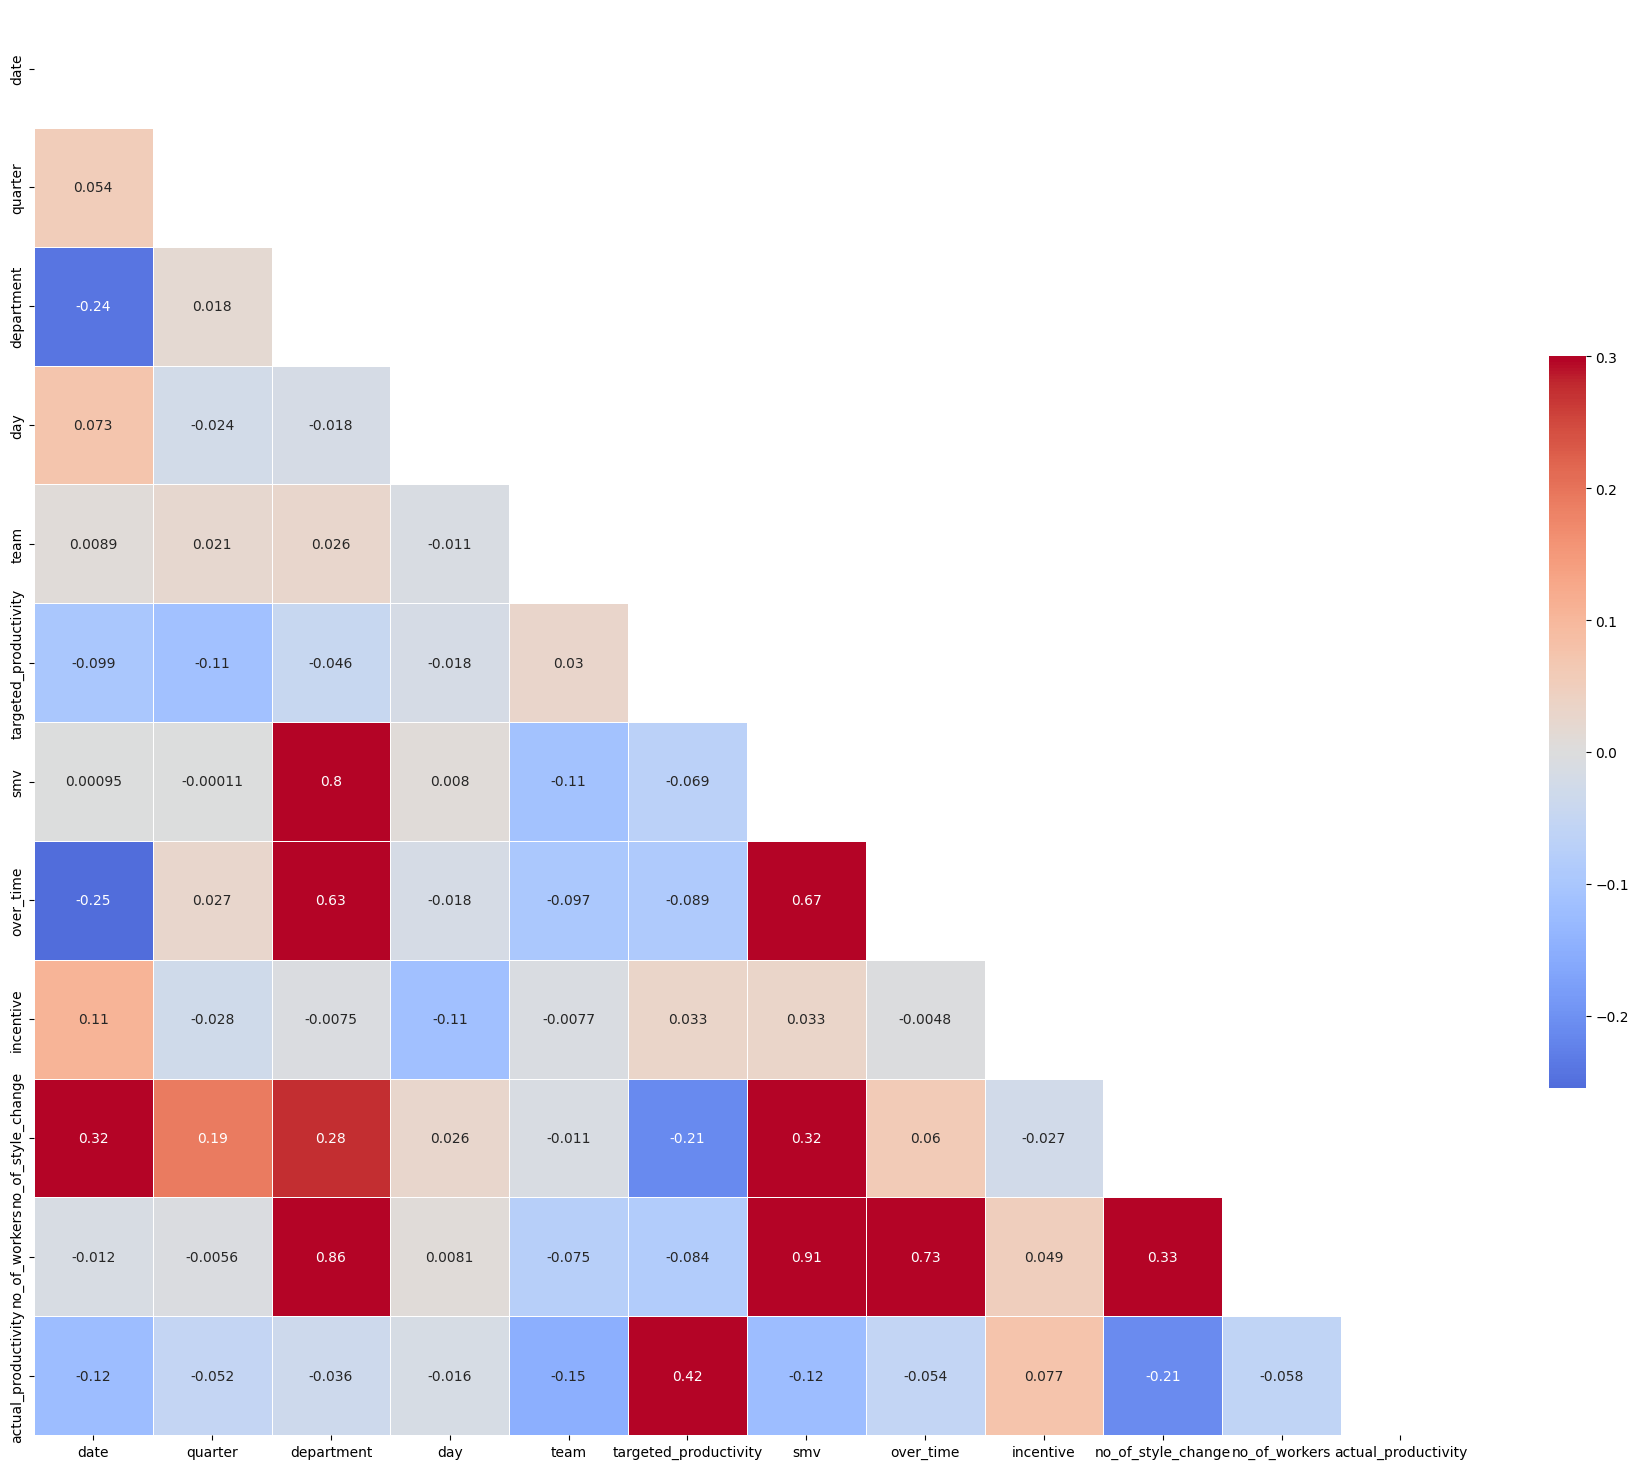

In [ ]:
f, ax = plt.subplots(figsize=(23, 19))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5} , annot=True)

plt.show()

## **Heatmap Analysis: Correlation Matrix of Garment Worker Productivity Dataset**

A correlation heatmap visualizes relationships between numerical features, helping identify strong associations
and potential multicollinearity. Below is a detailed analysis:

---

## **1. Key Positive Correlations**
- **`smv` vs. `no_of_workers` (0.91)**
  - A very strong positive correlation indicates that more complex tasks (higher SMV) require more workers.

  - This aligns with expectations, as intricate tasks demand larger teams.

- **`over_time` vs. `smv` (0.67)**
  - Tasks with higher standard minute values tend to have higher overtime, suggesting that longer tasks require
    extended work hours to meet productivity goals.

- **`over_time` vs. `no_of_workers` (0.73)**
  - Higher overtime is associated with more workers, implying that when overtime is necessary,
    more workers may be scheduled.

- **`targeted_productivity` vs. `actual_productivity` (0.42)**
  - A moderate correlation suggests that while productivity targets influence actual productivity,
    other external factors impact worker efficiency.

- **`incentive` vs. `no_of_style_change` (0.33)**
  - This suggests that when style changes occur frequently, incentives might be used as motivation
    to maintain efficiency.

---

## **2. Key Negative Correlations**
- **`quarter` vs. `over_time` (-0.25)**
  - Suggests that overtime decreases in later quarters, possibly due to seasonal effects or
    improved efficiency over time.

- **`department` vs. `smv` (-0.24)**
  - A weak negative correlation suggests that certain departments handle tasks with lower SMV values,
    indicating different workload distributions.

- **`targeted_productivity` vs. `no_of_style_change` (-0.21)**
  - More frequent style changes negatively impact productivity targets, possibly due to
    disruptions in workflow.

---

## **3. Insights on `actual_productivity`**
- **Weak Correlation with Most Features (-0.12 to 0.42)**
  - Unlike expectations, no single factor dominates productivity outcomes.

  - `targeted_productivity` has the highest correlation (0.42), but it is not the sole determinant.
  - Productivity seems influenced by a combination of multiple factors rather than a direct linear relationship.

---

## **4. Key Takeaways**
- More complex tasks (higher SMV) require more workers and often lead to increased overtime.

- Overtime is strongly linked with both task complexity and workforce size.  
- Targeted productivity moderately influences actual productivity, but other factors contribute as well.
- Frequent style changes negatively impact productivity targets.
- No single feature fully explains actual productivity, indicating a need for multivariate modeling.

---

## **Conclusion**
The heatmap highlights important relationships that can guide feature selection for predictive modeling.  
Since actual productivity is influenced by multiple factors, machine learning models must account  
for interactions between various features to provide accurate predictions.


# **Time Features**

**1. Indexing by Date**
- We rename the DataFrame index using the 'date' column to facilitate time-series analysis.

- **Purpose:** Indexing by date allows easy access to time-based filtering, resampling, and trend analysis.


In [ ]:
df.rename(index=df['date'], inplace=True)

**2. Dropping the Original 'Date' Column**
- After setting 'date' as the index, we remove it from the DataFrame as a separate column.

- **Purpose:** Since the date is now the index, keeping it as a separate column is redundant.


In [ ]:
df.drop(['date'], axis=1, inplace=True)

# **Temporal Features**

**3. Extracting Temporal Features**
- We extract multiple time-based features from the indexed date to enhance our dataset.

- **Purpose:** These features help in capturing seasonal trends, daily patterns, and potential time-dependent variations in productivity.


**4. Extracting Month**
- The month (1-12) is extracted from the date index.

- **Purpose:** Helps analyze monthly variations in productivity, such as seasonal effects or peak production periods.


In [ ]:
# Add temporal features
df['month'] = df.index.month

**5. Extracting Day of the Week**
- The day of the week (0 = Monday, 6 = Sunday) is extracted from the date index.

- **Purpose:** Helps identify weekly productivity patterns, such as differences in efficiency between weekdays and weekends.


In [ ]:
df['day_of_week'] = df.index.dayofweek

**6. Extracting Day of the Year**
- The day of the year (1-365) is extracted.

- **Purpose:** Helps analyze long-term trends over the year and detect seasonal variations.


In [ ]:
df['day_of_year'] = df.index.dayofyear

**7. Extracting Week of the Year**
- The ISO week number (1-52) is extracted.

- **Purpose:** Helps analyze productivity trends on a weekly basis, which can be useful for workload planning and optimization.


In [ ]:
df['week_of_year'] = df.index.isocalendar().week

 **8. Extracting Seasonal Information**
- The quarter (1-4) is extracted from the date index.

- **Purpose:** Identifies seasonal trends and potential fluctuations in worker productivity over different quarters of the year.

In [ ]:
df['season'] = df.index.quarter

In [ ]:
df

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,month,day_of_week,day_of_year,week_of_year,season
2015-01-01,0,2,3,8,0.80,26.16,7080,98,0,59.0,0.940725,1,3,1,1,1
2015-01-01,0,1,3,1,0.75,3.94,960,0,0,8.0,0.886500,1,3,1,1,1
2015-01-01,0,2,3,11,0.80,11.41,3660,50,0,30.5,0.800570,1,3,1,1,1
2015-01-01,0,2,3,12,0.80,11.41,3660,50,0,30.5,0.800570,1,3,1,1,1
2015-01-01,0,2,3,6,0.80,25.90,1920,50,0,56.0,0.800382,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-11,1,0,5,10,0.75,2.90,960,0,0,8.0,0.628333,3,2,70,11,1
2015-03-11,1,0,5,8,0.70,3.90,960,0,0,8.0,0.625625,3,2,70,11,1
2015-03-11,1,0,5,7,0.65,3.90,960,0,0,8.0,0.625625,3,2,70,11,1
2015-03-11,1,0,5,9,0.75,2.90,1800,0,0,15.0,0.505889,3,2,70,11,1


**9. Dropping the 'Quarter' Column**
- After extracting 'season', we remove the original 'quarter' column.

- **Purpose:** Avoids redundancy since the same information is now represented in the 'season' column.

In [ ]:
df.drop('quarter', axis=1, inplace=True)

## **Summary of Key Benefits**

- Enhances feature set by incorporating time-related variables, allowing models to learn from temporal patterns.

- Facilitates trend analysis by breaking down productivity variations across different timeframes (monthly, weekly, seasonal).
- Improves predictive modeling by capturing dependencies between time and productivity fluctuations.

# **Lag Features**

**1. Creating a Copy of the DataFrame**
- We create a separate copy of the dataset (`df_lag`) to store lag features.

- **Purpose:** This prevents modifications to the original dataset and allows safe experimentation with lag-based feature engineering.

In [ ]:
df_lag = df.copy()

**2. Defining a Function to Add Lag Features**
- This function generates lagged versions of a specified column for a given number of previous time steps.
- **Parameters:**
  - `df_lag`: The DataFrame where lag features will be added.
  
  - `column`: The name of the feature to create lag versions for.
  - `lags`: The number of past time steps to include as features.
- **Purpose:** Lag features capture historical values, allowing models to learn from past trends and improve forecasting accuracy.

In [ ]:
def add_lag_features(df_lag, column, lags):
    for lag in range(1, lags + 1):
       df_lag[f'{column}_lag_{lag}'] = df_lag[column].shift(lag)

**3. Defining Columns to Apply Lag Features**
- We specify key numerical columns for which lag features should be generated.

- **Purpose:** These selected features are expected to have temporal dependencies that impact productivity over time.

In [ ]:
columns_to_lag = {
    'actual_productivity': 3,
    'smv': 3,
    'targeted_productivity': 3,
    'over_time': 3,
    'incentive': 3,
    'no_of_workers': 3,
}

**4. Generating Lag Features**
- We iterate over the selected columns and apply the `add_lag_features` function.

- **Purpose:** This systematically creates lagged variables for each specified feature, helping capture historical influences.

In [ ]:
for column, lags in columns_to_lag.items():
    add_lag_features(df_lag, column, lags)

**5. Sorting the DataFrame by Date**
- Sorting ensures that lagged values correspond to the correct past time steps.

- **Purpose:** Proper ordering is crucial when working with time-series data to maintain chronological consistency.

In [ ]:
df_lag.sort_index(inplace=True)

In [ ]:
df_lag

,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,...,targeted_productivity_lag_3,over_time_lag_1,over_time_lag_2,over_time_lag_3,incentive_lag_1,incentive_lag_2,incentive_lag_3,no_of_workers_lag_1,no_of_workers_lag_2,no_of_workers_lag_3
2015-01-01,2,3,8,0.80,26.16,7080,98,0,59.0,0.940725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,1,3,1,0.75,3.94,960,0,0,8.0,0.886500,...,NaN,7080.0,NaN,NaN,98.0,NaN,NaN,59.0,NaN,NaN
2015-01-01,2,3,11,0.80,11.41,3660,50,0,30.5,0.800570,...,NaN,960.0,7080.0,NaN,0.0,98.0,NaN,8.0,59.0,NaN
2015-01-01,2,3,12,0.80,11.41,3660,50,0,30.5,0.800570,...,0.80,3660.0,960.0,7080.0,50.0,0.0,98.0,30.5,8.0,59.0
2015-01-01,2,3,6,0.80,25.90,1920,50,0,56.0,0.800382,...,0.75,3660.0,3660.0,960.0,50.0,50.0,0.0,30.5,30.5,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-11,0,5,10,0.75,2.90,960,0,0,8.0,0.628333,...,0.70,6840.0,4560.0,6840.0,26.0,40.0,30.0,57.0,38.0,57.0
2015-03-11,0,5,8,0.70,3.90,960,0,0,8.0,0.625625,...,0.70,960.0,6840.0,4560.0,0.0,26.0,40.0,8.0,57.0,38.0
2015-03-11,0,5,7,0.65,3.90,960,0,0,8.0,0.625625,...,0.65,960.0,960.0,6840.0,0.0,0.0,26.0,8.0,8.0,57.0
2015-03-11,0,5,9,0.75,2.90,1800,0,0,15.0,0.505889,...,0.75,960.0,960.0,960.0,0.0,0.0,0.0,8.0,8.0,8.0


**6. Handling Missing Values**
- Lagging inherently introduces missing values in the first few rows (since past data isn't available for initial entries).

- **Solution:** We remove rows with missing values using `.dropna()`.
- **Purpose:** Ensures clean data input for machine learning models without NaN values disrupting training.

In [ ]:
df_lag.dropna(inplace=True)

## **Summary of Key Benefits**

- Enhances temporal understanding by incorporating past productivity values into the feature set.

- Improves model accuracy by allowing algorithms to recognize historical patterns in productivity trends.
- Prepares data for time-series modeling, making it suitable for regression-based forecasting approaches.

# **Data with Engineered Time Features Preprocessing**

**1.from sklearn.preprocessing import StandardScaler**

The StandardScaler is used to standardize the dataset by scaling features to have a mean of 0 and a standard deviation of 1. This ensures that all features are on the same scale, improving model performance and reducing bias.

---

**2.from sklearn.model_selection import train_test_split**

**Purpose of train_test_split**

- train_test_split is a utility function used to split a dataset into training and testing sets.

- It is a critical step in the machine learning workflow to:

 1. Train the model on one part of the data (training set).

 2. Evaluate the model's performance on unseen data (testing set) to assess its generalization ability.

**Summary**

- train_test_split is a function to split data into training and testing sets.

- It ensures the model can be trained and evaluated properly.

- The test set acts as unseen data to measure how well the model generalizes to new inputs.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**1. Defining Features and Target Variable**
- We separate the dataset into:
  - **Features (`X_temporal`)**: All columns except `actual_productivity`, as these are the predictors.
  
  - **Target (`y_temporal`)**: The `actual_productivity` column, which we aim to predict.
- **Purpose:** Clearly defining the feature set and target variable is a crucial step before training machine learning models.

In [ ]:
x_temporal = df.drop('actual_productivity', axis=1)
y_temporal = df['actual_productivity']

**2. Defining Features and Target for Lagged Dataset**
- A separate feature-target split is created for the dataset containing lag features (`df_lag`).

- **Purpose:** This ensures that we can compare models trained with and without lag features.

In [ ]:
x_temporal_lagged = df_lag.drop('actual_productivity', axis=1)
y_temporal_lagged = df_lag['actual_productivity']

**3. Selecting Columns for Normalization**
- We define numerical features that require scaling.
- **Why?**
  - Different numerical scales can negatively impact model performance.
  - Standardization ensures all features contribute equally to model learning.

In [ ]:
columns_to_normalize = ['targeted_productivity', 'smv', 'over_time', 'incentive', 'no_of_workers', 'no_of_style_change']

**4. Applying Standardization**
- We use `StandardScaler()` to normalize the selected features.

- **Purpose:** Transforms numerical features to have a mean of 0 and a standard deviation of 1, improving model efficiency.

In [ ]:
scaler = StandardScaler()
x_temporal[columns_to_normalize] = scaler.fit_transform(x_temporal[columns_to_normalize])

**5. Normalizing Lagged Features**
- We extend the normalization process to lagged variables as well.

- **Why?** Lagged features, like the original numerical columns, may have varying scales that need adjustment.

In [ ]:
columns_to_normalize_lagged = ['targeted_productivity', 'smv', 'over_time', 'incentive', 'no_of_workers', 'no_of_style_change'] + \
                       [col for col in x_temporal_lagged.columns if '_lag_' in col]

In [ ]:
x_temporal_lagged[columns_to_normalize_lagged] = scaler.fit_transform(x_temporal_lagged[columns_to_normalize_lagged])

 **6. Splitting Data into Training and Testing Sets**
- We divide the dataset into:
  - **Training set (20%)**: Used to train the model.
  
  - **Testing set (80%)**: Used to evaluate model performance on unseen data.
- **Purpose:** Ensures that the model generalizes well to new data.

In [ ]:
x_train_temporal, x_test_temporal, y_train_temporal, y_test_temporal = train_test_split(x_temporal, y_temporal, train_size=0.2, random_state=42)

**7. Splitting Lagged Dataset into Training and Testing Sets**
- A separate train-test split is created for the dataset with lag features.

- **Purpose:** This enables comparison between models trained on standard features and those incorporating historical data.

In [ ]:
x_train_temporal_lagged, x_test_temporal_lagged, y_train_temporal_lagged, y_test_temporal_lagged = train_test_split(x_temporal_lagged, y_temporal_lagged, train_size=0.2, random_state=42)

## **Summary of Key Benefits**

- Feature-target separation ensures proper data organization for machine learning models.

- Normalization prevents features with larger ranges from dominating the learning process.
- Lagged feature processing enables historical trend learning for better productivity forecasting.
- Train-test split ensures that models are evaluated on unseen data to assess their generalization ability.

# **Linear Regression**

**Source:** sklearn.linear_model

---

**Purpose:**

`LinearRegression` is a supervised machine learning algorithm used for regression tasks. It models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data.

---

**Key Concept:**

- **Linear Relationship**: The fundamental assumption of linear regression is that there is a linear relationship between the input features and the target variable.

- **Least Squares Method**: The algorithm estimates the best-fit line by minimizing the sum of squared differences between the predicted values and the actual values in the dataset.

---

**How It Works:**

1. **Model Fitting**: The `LinearRegression` model fits a linear equation to the training data using the least squares method, calculating the weights (coefficients) for each feature.

2. **Prediction**: Once the model is trained, it can predict the target variable by applying the learned coefficients to the input features in the testing data.

3. **Intercept and Coefficients**: The model computes an intercept (bias) and coefficients for each feature. These values represent the magnitude and direction of the relationship between the features and the target.

---

**Advantages:**

- **Simplicity and Interpretability**: Linear regression is easy to understand and provides interpretable results, making it a good choice for a baseline model.

- **Efficiency**: The algorithm is computationally efficient and performs well with linearly separable data.

- **Well-suited for small to medium datasets**: It is effective when the number of features is relatively low, and the relationship between features and target is linear.

---

**When to Use:**

- **Linear Relationships**: Use linear regression when you believe there is a linear relationship between the features and the target variable.

- **Prediction Tasks**: It is suitable for predicting continuous variables (e.g., house prices, stock prices) based on independent features.

- **Baseline Model**: It’s often used as a baseline model because of its simplicity before moving on to more complex models if necessary.


In [ ]:
from sklearn.linear_model import LinearRegression

**Initializing the Linear Regression Model**
- We create an instance of the `LinearRegression` class.

- **Why?** This model assumes a linear relationship between independent variables (features) and
  the dependent variable (actual productivity).

In [ ]:
lr = LinearRegression()

This line of code is used to train the `LinearRegression` model on the training data.

---

**How It Works:**

- **lr:** This refers to the `LinearRegression` object that was previously initialized, which is the model we will use to predict `actual_productivity` based on the training data.

- **fit():** This method trains the model by learning the relationship between the input features (`x_train_temporal`) and the target variable (`y_train_temporal`). It computes the optimal coefficients (weights) for the linear equation that best predicts the target variable.

- **x_train_temporal:** This is the feature matrix for the training set. It contains all the independent variables (input features) that the model will use to make predictions. These features are based on temporal and productivity-related information like overtime, team size, and targeted productivity.

- **y_train_temporal:** This is the target variable (dependent variable) for the training set. It contains the actual productivity values that the model aims to predict. The model learns to predict these values based on the relationship between the features and the target.

---

**Purpose:**

- The `fit()` method computes the best-fitting line by finding the optimal coefficients (weights) for each feature that minimize the error between the predicted and actual target values. It uses the **least squares method** to estimate these coefficients. This method essentially minimizes the sum of the squared differences between the predicted values and the actual target values in the training set.

---

**Result:**

- After running this line, the `LinearRegression` model has learned from the training data. The model now has the estimated coefficients for each feature that represent how strongly each feature influences the target variable (`actual_productivity`). The model is now ready to make predictions on unseen data.


In [ ]:
lr.fit(x_train_temporal, y_train_temporal)

LinearRegression()

This line of code is used to make predictions on the test data using the trained `LinearRegression` model.

---

**How It Works:**

- **lr:** This refers to the previously trained `LinearRegression` model, which has learned the optimal coefficients (weights) from the training data.

- **predict():** This method uses the learned coefficients from the training data to make predictions on new, unseen data (the test set). It applies the linear relationship that was learned during the training phase to the test data.

- **x_test_temporal:** This is the feature matrix for the test set. It contains the independent variables (input features) that the model will use to predict the target variable. These features are based on temporal and productivity-related information such as overtime, team size, and targeted productivity.

---

**Purpose:**

- The `predict()` method applies the trained model to the test data (`x_test_temporal`) to generate predictions (`y_pred_test_lr`).

- These predictions are the model's estimates of the target variable (i.e., actual productivity) for the test set, based on the patterns and relationships the model learned during training.

---

**Result:**

- `y_pred_test_lr` contains the predicted values of the target variable (`y_test_temporal`), based on the input features in `x_test_temporal`.

- This output can be compared with the actual values (`y_test_temporal`) to evaluate the performance of the model using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared. This comparison helps assess how well the model generalizes to new, unseen data.


In [ ]:
y_pred_test_lr = lr.predict(x_test_temporal)

This line of code imports three evaluation metrics from the sklearn.metrics module, which are commonly used to assess the performance of regression models. These metrics help determine how well the model's predictions match the actual values in the test set.

---

1.**mean_squared_error (MSE):**

- Purpose:

 - This metric calculates the average of the squared differences between the predicted and actual values.

- Interpretation:

 - The MSE gives higher weight to large errors due to the squaring of differences.

 - Smaller values of MSE indicate better model performance.

 - It is sensitive to outliers, so large errors have a disproportionate effect on the score.

---

2.**mean_absolute_error (MAE):**

- Purpose:

 - This metric calculates the average of the absolute differences between the predicted and actual values.

- Interpretation:

 - MAE measures the magnitude of the errors without considering their direction (positive or negative).

 - Smaller values of MAE indicate better model performance.

 - Unlike MSE, MAE treats all errors equally, making it more robust to outliers.

---

3.**r2_score (R-squared):**

- Purpose:

 - This metric measures the proportion of the variance in the target variable that is predictable from the independent variables.

- Interpretation:

 - The R-squared value indicates the proportion of the variance in the target variable that is explained by the model.

 - Values closer to 1 suggest a good fit of the model to the data, while values closer to 0 indicate that the model does not explain the data well.

 - If R2 is negative, it indicates that the model is worse than a simple mean-based model (predicting the mean of the target variable for all predictions).

---

**Summary:**

These metrics allow for a comprehensive evaluation of the model's performance:

- MSE is sensitive to large errors.

- MAE gives a clearer view of average error magnitude.

- R-squared tells us how well the model explains the variance in the target variable.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Evaluating Model Performance on Test Data**
- We calculate `mse_test_lr`, `mae_test_lr`, and `r2_test_lr` to assess the model’s accuracy.

- **Purpose:** Helps determine how well the model predicts actual productivity.

In [ ]:
mse_test_lr = mean_squared_error(y_pred_test_lr, y_test_temporal)
mae_test_lr = mean_absolute_error(y_pred_test_lr, y_test_temporal)
r2_test_lr = r2_score(y_pred_test_lr, y_test_temporal)

 **Displaying Model Evaluation Metrics**
- We print the key performance metrics for the linear regression model.
- **Interpretation:**
  - Lower MSE and MAE indicate better prediction accuracy.

  - A higher R² score (closer to 1) suggests the model explains more variance in actual productivity.

In [ ]:
print(f'mean squared error is: {mse_test_lr}')
print(f'mean absolute error is: {mae_test_lr}')
print(f'R Squared is {r2_test_lr}')

mean squared error is: 0.024336845416975457
mean absolute error is: 0.11633852514280392
R Squared is -1.327695996804966


**Training the Model on Lagged Features**
- We retrain the linear regression model using the dataset with lag features (`x_train_temporal_lagged`).

- **Why?** Lagged features allow the model to incorporate past productivity trends for better forecasting.


In [ ]:
lr.fit(x_train_temporal_lagged, y_train_temporal_lagged)

LinearRegression()

**Making Predictions on the Lagged Test Set**
- We predict using the lagged test dataset (`x_test_temporal_lagged`).

- **Purpose:** Evaluates whether adding lag features improves model accuracy.

In [ ]:
y_pred_test_lagged_lr = lr.predict(x_test_temporal_lagged)

**Evaluating Model Performance on Lagged Data**
- We calculate MSE, MAE, and R² scores for the lagged dataset.

- **Purpose:** This helps compare the performance of the standard dataset vs. the dataset with lag features.

In [ ]:
mse_test_lagged_lr = mean_squared_error(y_pred_test_lagged_lr, y_test_temporal_lagged)
mae_test_lagged_lr = mean_absolute_error(y_pred_test_lagged_lr, y_test_temporal_lagged)
r2_test_lagged_lr = r2_score(y_pred_test_lagged_lr, y_test_temporal_lagged)

**Displaying Model Evaluation Metrics for Lagged Features**
- We print the key performance metrics for the lagged dataset.
- **Comparison:**
  - If MSE and MAE decrease, and R² improves, lag features enhance prediction performance.
  - If results remain similar, lag features may not significantly impact linear regression.

In [ ]:
print(f'mean squared error is: {mse_test_lagged_lr}')
print(f'mean absolute error is: {mae_test_lagged_lr}')
print(f'R Squared is {r2_test_lagged_lr}')

mean squared error is: 0.01705209131686371
mean absolute error is: 0.0764657177108749
R Squared is 0.2350267591366162


# **Polynomial Regression**

**Source:** sklearn.preprocessing

---

**Purpose:**

PolynomialFeatures is a preprocessing class used to generate polynomial and interaction features from the input data.
It is particularly useful when the relationship between features and the target variable is not linear,
as it allows the transformation of the features into higher-degree polynomials.

---

**Key Concept:**

- Polynomial Feature Generation:
This technique generates new features by considering powers of the original features.
For example, if you have features x1 and x2, PolynomialFeatures can create new features like x1^2, x2^2,
and interaction terms such as x1 * x2.

- Interaction Features:
Interaction terms are combinations of the input features that capture relationships between them.
These features help the model learn more complex patterns, especially in non-linear datasets.

- Degree of Polynomial:
The degree of the polynomial defines how many levels of powers of the features are generated.
For instance, a degree of 2 generates the original features, squared features, and interaction terms,
 while a degree of 3 would also add cubic terms and further interactions.

---

**How It Works:**

1. Feature Expansion:
PolynomialFeatures transforms the input features into higher-degree polynomial terms.
This allows a linear model (like linear regression) to capture non-linear relationships by creating polynomial interactions.

2. Fit and Transform:
When applied, PolynomialFeatures learns the degree of transformation from the data and applies it to create the expanded feature set.

3. Use Case with Regression Models:
For example, in a linear regression model, adding polynomial features allows the model to fit a curve instead of a straight line,
thereby improving performance on datasets with non-linear trends.

---

**Advantages:**

- Capturing Non-Linear Relationships:
It allows linear models to fit non-linear data by expanding the feature space to include polynomial terms.

- Improved Model Flexibility:
By adding polynomial features, the model can learn more complex patterns, improving its ability to capture non-linear relationships in the data.

---

**When to Use:**

- Non-Linear Data:
When you suspect that the relationship between the features and the target variable is not linear.

- Feature Engineering:
When you need to enhance a linear model's capacity to capture more complex relationships without switching to non-linear models.

---

**Summary:**

PolynomialFeatures is used to transform input data into polynomial and interaction terms, enabling linear models to capture non-linear relationships. By increasing the degree of the polynomial, the model gains more flexibility in fitting complex data patterns. This preprocessing technique is especially helpful when the dataset shows non-linear trends that a simple linear model cannot capture effectively.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

**poly = PolynomialFeatures()**

- **Purpose:**
  - This line initializes the `PolynomialFeatures` object, which will be used to generate polynomial features from the input data.
  These new features are combinations of the original features raised to different powers, allowing the model to capture non-linear relationships.

---

**x_poly_train = poly.fit_transform(x_train_temporal)**

- **fit():**
  - This method calculates and learns the polynomial features for the training data `x_train_temporal`. It identifies all combinations of the original features raised to the specified polynomial degree (default is degree 2), including interaction terms.

- **transform():**
  - After fitting, the `transform()` method is applied to the training data to actually create the polynomial features. Each feature is raised to the corresponding powers, and interaction terms are generated.

- **Result:**
  - `x_poly_train` is a new array that contains both the original features and the polynomial features for the training data. This allows the model to learn from non-linear combinations of features.

---

**x_poly_test = poly.fit_transform(x_test_temporal)**

- **transform():**
  - In this line, the same polynomial features transformation is applied to the test data (`x_test_temporal`). The important distinction here is that `fit_transform()` is used again, but ideally, you should use `transform()` instead, to apply the same transformation learned from the training data (i.e., using the polynomial terms generated during the training phase, without recalculating the polynomial features on the test data).

- **Result:**
  - `x_poly_test` is the transformed test dataset, where the features are expanded into polynomial and interaction terms just like in `x_poly_train`.
  This ensures the model receives the same transformation on both the training and test data.

---

**Purpose:**

1. **Generate Polynomial Features:**
  - The goal of using `PolynomialFeatures` is to expand the feature space to capture non-linear relationships between the input features and the target variable. This allows models like linear regression to fit a curve, rather than just a straight line.

2. **Prepare Data for Non-Linear Modeling:**
  - By creating polynomial features, we make the model capable of learning complex relationships, which is useful when the data is not linearly separable.

3. **Ensure Consistency:**
  - The transformed features (`x_poly_train` and `x_poly_test`) allow the model to learn from both non-linear interactions and original features, which may improve the model's performance, especially for regression models that rely on feature interactions.

---

**Summary:**

- `fit_transform()` creates polynomial features for the training dataset and stores the learned polynomial combinations.
- `transform()` applies the same transformation to the test data, ensuring consistency in how both datasets are represented for modeling.
"""


In [ ]:
poly = PolynomialFeatures()
x_poly_train = poly.fit_transform(x_train_temporal)
x_poly_test = poly.fit_transform(x_test_temporal)

- **Purpose:**
  - This line creates an instance of the `LinearRegression` model and assigns it to the variable `pr`.
  - `LinearRegression` is a machine learning model used for regression tasks that predicts a continuous target variable based on the input features.
  - In this case, it will be applied to polynomial-transformed features to capture non-linear relationships.

---

**pr.fit(x_poly_train, y_train_temporal)**

- **fit():**
  - The `fit()` method trains the `LinearRegression` model using the transformed training data `x_poly_train`
  (which includes polynomial features) and the target variable `y_train_temporal` (the actual productivity values we want to predict).

- **How It Works:**
  - The model finds the optimal coefficients (weights) for each polynomial feature in `x_poly_train`
  that minimize the difference between the predicted and actual target values, typically using the least squares method.
  - These coefficients represent the relationship between the input features (including their polynomial terms) and the target variable.

- **Result:**
  - After running this line, the `pr` (LinearRegression) model has learned from the data, and it is now ready to make predictions based on the input features,
  taking into account the polynomial relationships between them.

---

**Purpose:**

- Training the Model:
  - This step fits the model to the transformed training data, allowing the algorithm to learn the relationship between the polynomial features and the target variable.

- Preparing for Prediction:
  - Once the model is fitted, it can be used to predict target values for new, unseen data, capturing non-linear dependencies effectively.


In [ ]:
pr = LinearRegression()
pr.fit(x_poly_train, y_train_temporal)

LinearRegression()

**y_pred_test_pr = pr.predict(x_poly_test)**

- **Purpose:**
  - This line of code is used to make predictions on the test data using the trained `LinearRegression` model (`pr`),
  where the input features have been transformed into polynomial features.

---

**How It Works:**

- **pr:**
  - This refers to the previously trained `LinearRegression` model (`pr`), which has learned the relationship
  between the polynomial features (`x_poly_train`) and the target variable (`y_train_temporal`).

- **predict():**
  - This method uses the learned coefficients from the training data to make predictions on new data,
  in this case, the polynomial-transformed test data (`x_poly_test`).

- **x_poly_test:**
  - This is the feature matrix for the test set, where the features have already been transformed into polynomial terms,
  similar to what was done with the training data.

---

**Purpose:**

- The `predict()` method applies the learned `LinearRegression` model to the transformed test data (`x_poly_test`)
  to generate predictions (`y_pred_test_pr`).

- These predictions represent the model’s estimates of the target variable (`actual_productivity`) based on the input features (polynomial terms) in `x_poly_test`.

---

**Result:**

- **y_pred_test_pr:**
  - This contains the predicted values for the target variable (`y_test_temporal`) based on the polynomial-transformed features in `x_poly_test`.

- These predictions can be compared with the actual values (`y_test_temporal`) to evaluate the model's performance using metrics
  like Mean Squared Error (MSE), Mean Absolute Error (MAE), or R-squared (R²).



In [ ]:
y_pred_test_pr = pr.predict(x_poly_test)

**Evaluating the Polynomial Regression Model**
- We evaluate the model's performance using standard regression metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score.

- **Purpose:** These metrics help assess how well the model fits the data and generalizes to unseen examples.

In [ ]:
mse_test_pr = mean_squared_error(y_pred_test_pr, y_test_temporal)
mae_test_pr = mean_absolute_error(y_pred_test_pr, y_test_temporal)
r2_test_pr = r2_score(y_pred_test_pr, y_test_temporal)

**Displaying the Performance Metrics**
- We print the MSE, MAE, and R² score for the polynomial regression model.
- **Interpretation:**
  - **Lower MSE and MAE** values indicate better performance.
  - **Higher R²** suggests that the polynomial regression model explains a larger portion of the variance in actual productivity.

In [ ]:
print('Scores of test data from dataframe and Polynominal regression')
print(f'mean squared error is: {mse_test_pr}')
print(f'mean absolute error is: {mae_test_pr}')
print(f'R Squared is {r2_test_pr}')

Scores of test data from dataframe and Polynominal regression
mean squared error is: 0.02892733242212967
mean absolute error is: 0.12177249459467379
R Squared is 0.05639650420479381


**Transforming the Lagged Training Data for Polynomial Regression**
- We repeat the transformation process for the dataset with lag features (`x_train_temporal_lagged`).

- **Why?** This allows us to evaluate the impact of lag features when using polynomial regression, capturing the non-linear relationships in the temporal data.

---

**Transforming the Lagged Test Data for Polynomial Regression**
- We transform the lagged test data (`x_test_temporal_lagged`) to align with the training data transformations.

- **Purpose:** Ensures consistency between the training and test sets when polynomial features are applied to lagged data.

In [ ]:
x_poly_train_lagged = poly.fit_transform(x_train_temporal_lagged)
x_poly_test_lagged = poly.fit_transform(x_test_temporal_lagged)

**Training the Polynomial Regression Model on Lagged Features**
- We fit the polynomial regression model to the lagged training data (`x_poly_train_lagged`).

- **Why?** Evaluating the polynomial regression model on lagged features will help us understand the role of historical trends in predicting productivity.

In [ ]:
pr.fit(x_poly_train_lagged, y_train_temporal_lagged)

LinearRegression()

**Making Predictions Using the Polynomial Regression Model with Lagged Features**
- We predict using the polynomial regression model on the lagged test data (`x_poly_test_lagged`).

- **Purpose:** Evaluates whether lagged features improve predictions when using polynomial regression.

In [ ]:
y_pred_test_lagged_pr = pr.predict(x_poly_test_lagged)

**Evaluating the Polynomial Regression Model with Lagged Features**
- We calculate the performance metrics (MSE, MAE, and R² score) for the model with lagged features.

- **Purpose:** This helps compare the model's performance with and without lag features, identifying the impact of historical data on the predictions.

In [ ]:
mse_test_lagged_pr = mean_squared_error(y_pred_test_lagged_pr, y_test_temporal_lagged)
mae_test_lagged_pr = mean_absolute_error(y_pred_test_lagged_pr, y_test_temporal_lagged)
r2_test_lagged_pr = r2_score(y_pred_test_lagged_pr, y_test_temporal_lagged)

**Displaying the Performance Metrics for the Lagged Polynomial Model**
- We print the evaluation metrics for the polynomial regression model with lagged features.
- **Comparison:**
  - A decrease in MSE and MAE, along with an increase in R², would suggest that lag features enhance the model's predictive power.
  - If the metrics remain similar, it would imply that lag features do not significantly improve the model in polynomial regression.

In [ ]:
print(f'mean squared error is: {mse_test_lagged_pr}')
print(f'mean absolute error is: {mae_test_lagged_pr}')
print(f'R Squared is {r2_test_lagged_pr}')

mean squared error is: 0.11501976796625771
mean absolute error is: 0.1633274899675931
R Squared is 0.09903687772930936


# **Decision Tree**

**Source:** sklearn.tree

---

**Purpose:**
DecisionTreeRegressor is a supervised machine learning algorithm used for regression tasks.
It predicts continuous target variables by learning simple decision rules inferred from the input features.
The algorithm partitions the data into smaller subsets based on feature values, ultimately forming a tree structure.

---

**Key Concept:**

- **Tree-Based Model:**
  - A decision tree splits the dataset into smaller regions by creating branches based on feature thresholds.
  - Each leaf node represents a predicted value.

- **Recursive Partitioning:**
  - The algorithm recursively splits the data to minimize the error (e.g., Mean Squared Error) within each partition.

- **Overfitting Control:**
  - Hyperparameters such as `max_depth`, `min_samples_split`, and `min_samples_leaf` help control the tree’s growth and reduce overfitting.

---

**How It Works:**

1. **Tree Construction:**
   - The algorithm starts with the entire dataset at the root node and splits it into subsets based on the feature
     that minimizes the error (e.g., variance reduction).

2. **Node Splitting:**
   - At each node, the best split is determined by evaluating all possible splits for all features.

3. **Prediction:**
   - The final prediction for a new data point is based on the average target value of the training data in the leaf node where the point lands.

---

**Advantages:**

- **Interpretability:**
  - The model is easy to visualize and interpret, as decisions are based on simple if-then rules.

- **Handles Non-Linear Relationships:**
  - Decision trees can capture complex, non-linear relationships between features and the target variable.

- **No Scaling Required:**
  - The model does not require feature scaling or standardization.

- **Feature Selection:**
  - Automatically selects the most important features by splitting on the most informative ones first.

---

**When to Use:**

- **Non-Linear Data:**
  - When the relationship between the input features and target variable is non-linear or complex.

- **Feature Importance Analysis:**
  - When you want to understand which features are most relevant for predictions.

- **Small to Medium-Sized Datasets:**
  - Decision trees perform well on smaller datasets but can overfit on large datasets without proper regularization.

---

**Summary:**
DecisionTreeRegressor is a flexible and interpretable regression algorithm that works well for non-linear
relationships and datasets with complex interactions. It partitions the data into smaller regions, forming
a tree structure that predicts the target variable. Proper tuning of tree parameters ensures optimal
performance and prevents overfitting.


In [ ]:
from sklearn.tree import DecisionTreeRegressor

**Source:** sklearn.model_selection

---


**Purpose:**

- RandomizedSearchCV is a hyperparameter optimization technique used to tune machine learning model parameters. It searches for the best combination of hyperparameters by sampling from specified distributions or lists of parameter values.

- Unlike GridSearchCV, which tests all possible combinations of hyperparameters exhaustively, RandomizedSearchCV selects a fixed number of random combinations, making it faster and more efficient, especially for large parameter grids.

---

**Key Concepts:**

- Hyperparameter Tuning:

 - The process of selecting the best hyperparameters for a machine learning model to improve performance.

 - Hyperparameters are parameters that are not learned from the data (e.g., C, max_depth, learning_rate).

- Random Sampling:

 - Instead of testing every possible combination, RandomizedSearchCV selects hyperparameter combinations randomly, reducing computational time.

- Cross-Validation:

 - RandomizedSearchCV evaluates each combination using cross-validation, ensuring robust performance assessment on the training data.

- Performance Metric:

 - The evaluation metric (e.g., accuracy, R-squared) is used to determine the best hyperparameter combination.


---


**How It Works:**

1. Define Hyperparameter Distributions:

 - Specify the hyperparameters to optimize and their respective ranges or distributions.

2. Random Sampling:

 - RandomizedSearchCV randomly selects a subset of hyperparameter combinations to evaluate.

3. Model Evaluation:

 - For each sampled combination, the model is trained and evaluated using cross-validation.

4. Best Combination:

 - The hyperparameter combination that gives the highest score based on the specified metric is selected.

---

**Parameters:**

- estimator: The machine learning model for which hyperparameters are being tuned (e.g., RandomForestClassifier, SVR).

- param_distributions: A dictionary specifying the hyperparameters and their ranges or distributions.

- n_iter: Number of parameter settings sampled. Controls the trade-off between speed and thoroughness.

- cv: Number of cross-validation folds used to evaluate each parameter combination.

- scoring: Metric used to evaluate model performance (e.g., 'accuracy', 'r2', 'neg_mean_squared_error').
random_state: Ensures reproducibility of the random sampling.

---

**Advantages:**

- Efficient for Large Parameter Grids: Unlike GridSearchCV, it evaluates a random subset, saving computation time.

- Handles Continuous Distributions: Can sample from distributions like uniform or log-uniform for hyperparameters.

- Reproducibility: Controlled randomness ensures consistent results with the same random_state.

---

**When to Use:**

- Large Parameter Grids: When an exhaustive search (GridSearchCV) would be computationally prohibitive.

- Preliminary Tuning: To narrow down hyperparameter ranges before conducting a more exhaustive search.

- Limited Resources: When computational efficiency is important.

---

**Summary:**

RandomizedSearchCV is an efficient hyperparameter optimization technique that balances thoroughness and computational cost by randomly sampling hyperparameter combinations. It is well-suited for large parameter grids and provides a systematic way to find the best hyperparameters while avoiding the exhaustive nature of grid searches.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

**1. dt = DecisionTreeRegressor()**

**Purpose:**
- Creates an instance of the **DecisionTreeRegressor** with default parameters.
- This object represents the decision tree regression model, which will later be used in conjunction with hyperparameter
  tuning techniques (like `RandomizedSearchCV`) to train and evaluate the model.

**Default Behavior:**
- At this stage, the DecisionTreeRegressor model has no specific hyperparameter values assigned, meaning it will use the
  default settings:
  - `criterion='squared_error'`: Minimizes variance for regression tasks.
  - `splitter='best'`: Chooses the best split at each node.

  - `max_depth=None`: The tree grows until all leaves are pure or until the dataset is fully split.
  - `min_samples_split=2`: A node must have at least 2 samples to be split.
  - `min_samples_leaf=1`: A leaf node must contain at least one sample.
  - `max_features=None`: Considers all available features when searching for the best split.
  - `max_leaf_nodes=None`: No limit on the number of leaf nodes, allowing the tree to grow freely.

---

**2. param_grid_dt**

**Purpose:**
- Defines a dictionary of hyperparameters to explore during hyperparameter tuning.
- Each key corresponds to a hyperparameter of the DecisionTreeRegressor model, and the associated values represent the
  options to be tested.

---

**Parameters of DecisionTreeRegressor:**

**criterion**
- Specifies the function to measure the quality of a split.
- Options include:
  - `'squared_error'`: Default, minimizes variance for regression tasks.
  - `'friedman_mse'`: An optimized version of MSE, improving efficiency for large datasets.
  - `'absolute_error'`: Minimizes the mean absolute error, making the model more robust to outliers.
  - `'poisson'`: Used for count data, assumes the target variable follows a Poisson distribution.

**splitter**
- Strategy used to choose the split at each node.
- Options include:
  - `'best'`: Chooses the best split based on the criterion.
  - `'random'`: Selects a random split, introducing randomness to the tree structure.

**max_depth**
- Controls the maximum depth of the tree.
- Options:
  - `None`: The tree grows until all leaves are pure or until the dataset is fully split.
  - Integer values (e.g., 5, 10, 20, 30): Limits the depth to prevent overfitting.

**min_samples_split**
- The minimum number of samples required to split an internal node.
- Options:
  - `2`: Default, splits occur when at least 2 samples are present.
  - Higher values (e.g., 5, 10, 20) enforce larger splits, reducing overfitting.

**min_samples_leaf**
- The minimum number of samples required to be in a leaf node.
- Options:
  - `1`: Default, allows small splits.
  - Higher values (e.g., 2, 5, 10) smooth predictions by merging small splits, reducing overfitting.

**max_features**
- The number of features to consider when looking for the best split.
- Options:
  - `None`: Considers all features.

  - `'sqrt'`: Considers the square root of the total number of features.
  - `'log2'`: Considers the logarithm (base 2) of the total number of features.

**max_leaf_nodes**
- Limits the number of leaf nodes in the tree.
- Options:
  - `None`: No limit, allowing the tree to grow freely.
  - Smaller values (e.g., 10, 20, 50, 100) create simpler trees, reducing overfitting.

---

**Summary:**
- The **DecisionTreeRegressor** instance (`dt`) is initialized with default parameters, ready for training or tuning.

- The **param_grid_dt** dictionary defines a range of hyperparameters to explore during hyperparameter tuning.
- Each hyperparameter affects the tree’s structure, splitting strategy, or prediction behavior, enabling the model to
  adapt to the dataset and balance complexity and accuracy.
- This setup ensures flexibility in finding the best model configuration for regression tasks.


In [ ]:
dt = DecisionTreeRegressor()

param_grid_dt = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],  # Criteria to measure split quality
    'splitter': ['best', 'random'],  # Strategy to choose the split at each node
    'max_depth': [None, 5, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5, 10],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'max_leaf_nodes': [None, 10, 20, 50, 100],  # Maximum number of leaf nodes
}


**1. RandomizedSearchCV Initialization**

**Purpose:**
- Performs a randomized search over a specified grid of hyperparameters for the **DecisionTreeRegressor (dt)**.
- Evaluates a fixed number of randomly selected combinations from the parameter grid (`param_grid_dt`) and selects the one with the best performance.
- Helps optimize the decision tree model while reducing computational cost compared to exhaustive grid search.

---

**Parameters Explained:**

**estimator=dt**
- Uses the **DecisionTreeRegressor (dt)** as the base model to be tuned.

**param_distributions=param_grid_dt**
- Specifies the hyperparameter grid (`param_grid_dt`) containing possible values for:
  - **criterion**: Functions like `'squared_error'`, `'friedman_mse'`, `'absolute_error'`, and `'poisson'` to measure split quality.

  - **splitter**: Strategies like `'best'` or `'random'` to determine how splits are chosen at each node.
  - **max_depth**: Limits the maximum depth of the tree to control overfitting.
  - **min_samples_split** and **min_samples_leaf**: Ensure minimum data points in nodes to prevent overfitting.
  - **max_features** and **max_leaf_nodes**: Control tree complexity by limiting the number of features and leaf nodes.
- The search process randomly samples different hyperparameter combinations to find the best-performing model.

**cv=3**
- Uses **3-fold cross-validation**, meaning:
  - The dataset is split into 3 equal parts.
  - Each hyperparameter combination is evaluated 3 times using different train-test splits.
  - Ensures model performance is validated across multiple subsets of data.

**scoring='neg_mean_squared_error'**
- Specifies **negative mean squared error (MSE)** as the evaluation metric.
- Since lower MSE indicates better performance, the model selects the combination that minimizes this error.

**verbose=3**
- Displays detailed output during the search process, showing progress for each hyperparameter combination.

**return_train_score=True**
- Records training scores along with validation scores for each hyperparameter combination.
- Helps in analyzing whether the model is overfitting.

---

**2. Fitting the Model with RandomizedSearchCV**
**rand_dt.fit(x_train_temporal, y_train_temporal)**

**Purpose:**
- Trains the **RandomizedSearchCV** object using the scaled training data (`x_train_temporal`) and target variable (`y_train_temporal`).
- Searches for the best hyperparameter combination based on cross-validation results.

**What Happens During `fit()`**
1. **Random Sampling of Hyperparameters:**
   - RandomizedSearchCV selects a fixed number of hyperparameter combinations (instead of testing all combinations as in GridSearchCV).

2. **For Each Combination:**
   - The model is trained using the selected hyperparameters.
   - Cross-validation is performed to evaluate model performance on different subsets of training data.
   - Training scores are recorded (because `return_train_score=True`).

3. **Best Hyperparameter Selection:**
   - The combination that yields the lowest **negative mean squared error** is stored in `rand_dt.best_params_`.

---

**3. How It Works:**
**Step 1: Randomized Search**
- Unlike **GridSearchCV**, which tests all possible combinations, **RandomizedSearchCV** randomly selects a subset of hyperparameter configurations, making it computationally efficient.

**Step 2: Cross-Validation**
- Each selected combination is validated using **3-fold cross-validation** to ensure reliable evaluation.

**Step 3: Selecting the Best Model**
- The hyperparameter combination with the lowest **negative mean squared error** is chosen as the optimal setting.

---

**4. Key Outputs After Fitting:**
- **rand_dt.best_params_** → Returns the best combination of hyperparameters.
- **rand_dt.best_score_** → The best cross-validated score achieved during the search.
- **rand_dt.cv_results_** → Provides details on all evaluated hyperparameter combinations, including training and validation scores.

---

**5. Summary**
- **RandomizedSearchCV** efficiently explores a random subset of hyperparameter combinations from `param_grid_dt` for tuning **DecisionTreeRegressor**.

- The **fit()** method trains and evaluates the model using **3-fold cross-validation** to ensure robustness.
- The best hyperparameters are chosen based on **negative mean squared error (MSE)**, optimizing the model’s performance.
- This approach balances **efficiency** (by avoiding exhaustive search) and **accuracy** (by selecting the best-performing model).


In [ ]:
rand_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_grid_dt, cv=3, scoring='neg_mean_squared_error', verbose=3, return_train_score=True)
rand_dt.fit(x_train_temporal, y_train_temporal)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END criterion=absolute_error, max_depth=20, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=-0.016, test=-0.026) total time=   0.0s
[CV 2/3] END criterion=absolute_error, max_depth=20, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=-0.015, test=-0.025) total time=   0.0s
[CV 3/3] END criterion=absolute_error, max_depth=20, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=(train=-0.015, test=-0.026) total time=   0.0s
[CV 1/3] END criterion=poisson, max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, splitter=best;, score=(train=-0.014, test=-0.022) total time=   0.0s
[CV 2/3] END criterion=poisson, max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, splitter=

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_leaf_nodes': [None, 10, 20, 50,
                                                           100],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'splitter': ['best', 'random']},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=3)

**Show the best params**

In [ ]:
rand_dt.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 10,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'friedman_mse'}

**Purpose**

- This configuration initializes a **DecisionTreeRegressor** with specific hyperparameters optimized
  from previous hyperparameter tuning (e.g., `RandomizedSearchCV`).

- By using these parameter values, the **DecisionTreeRegressor** model is better suited to the dataset,
  achieving improved predictive accuracy and generalization.
- The chosen parameters effectively control tree complexity and ensure the model avoids overfitting,
  while still capturing important relationships in the data.

---

**Summary of Parameters**

**criterion='friedman_mse'**
- Specifies the function used to measure the quality of a split.
- `'friedman_mse'` is an optimized version of **Mean Squared Error (MSE)** that reduces bias and
  improves split quality, particularly for larger datasets.

**splitter='best'**
- Determines the strategy used to split nodes.
- `'best'` chooses the most optimal split based on the **criterion**, ensuring the highest variance
  reduction at each step.

**min_samples_split=5**
- Sets the minimum number of samples required to split an internal node.
- Ensures that a node will only be split if it contains at least 5 samples, preventing unnecessary
  divisions and reducing overfitting.

**min_samples_leaf=2**
- Specifies the minimum number of samples required to be in a leaf node.
- A value of 2 ensures that terminal nodes contain at least two samples, preventing overly fine
  splits that may cause high variance.

**max_leaf_nodes=10**
- Limits the number of leaf nodes in the tree.
- Restricting the tree to at most 10 leaf nodes helps simplify the model and improve generalization,
  reducing the risk of overfitting.

**max_features=None**
- Determines the number of features to consider when looking for the best split.
- `None` means all features are considered at each split, allowing the tree to fully utilize the dataset’s
  feature set.

**max_depth=10**
- Limits the maximum depth of the tree.
- Ensures that the tree does not grow excessively deep, controlling overfitting while maintaining predictive
  performance.

---

**Significance**
- The optimized parameters create a **decision tree model tailored** to the dataset’s specific characteristics,
  balancing **complexity and accuracy**.

- By limiting **tree depth**, number of **leaf nodes**, and **minimum samples per split**, the model
  **avoids overfitting** while capturing meaningful patterns.
- The use of `'friedman_mse'` as the criterion ensures **better split quality**, improving efficiency and
  prediction reliability.



In [ ]:
best_dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', min_samples_split=5, min_samples_leaf=2,
                           max_leaf_nodes=10, max_features=None, max_depth=10)

**Training the Optimized Decision Tree Model**

This line of code trains the **DecisionTreeRegressor** model with the optimized hyperparameters on the training data.

---

**How It Works:**

- **best_dt:**  
  - Refers to the `DecisionTreeRegressor` object initialized with **optimized hyperparameters**
    (e.g., `criterion='friedman_mse'`, `splitter='best'`, etc.) in the previous step.  

- **fit():**  
  - The `.fit()` method trains the model by learning the relationship between the **input features (`x_train_temporal`)**
    and the **target variable (`y_train_temporal`)**.  
  - The decision tree recursively splits the data to minimize prediction error, forming a structured decision-making model.  

- **x_train_temporal:**  
  - The **feature matrix** for the training set, consisting of independent variables that influence the target outcome.  
  - Since decision trees do not require feature scaling, this dataset is used in its original form.  

- **y_train_temporal:**  
  - The **target variable (dependent variable)** containing the actual productivity values that the model aims to predict.  

---

**Purpose:**

- The `.fit()` method **trains the DecisionTreeRegressor** by recursively splitting the data based on the optimized hyperparameters.  
- The chosen parameters (e.g., `max_depth=10`, `min_samples_split=5`, `max_leaf_nodes=10`) control tree complexity, ensuring
  the model **generalizes well without overfitting**.  

---

**Result:**

- After executing this line, the optimized **DecisionTreeRegressor model (`best_dt`)** has learned the relationships between
  input features and the target variable.  

- The trained model is now ready to **make predictions** on unseen data, leveraging the tuned hyperparameters to balance
  **model complexity and accuracy** effectively.  


In [ ]:
best_dt.fit(x_train_temporal, y_train_temporal)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_leaf_nodes=10,
                      min_samples_leaf=2, min_samples_split=5)

**Making Predictions with the Optimized Decision Tree Model**

This line of code is used to make predictions on the test data using the trained **DecisionTreeRegressor** model with optimized hyperparameters.

---

**How It Works:**

- **best_dt:**  
  - Refers to the previously trained **DecisionTreeRegressor** model, which was initialized with **optimized hyperparameters**
    (e.g., `criterion='friedman_mse'`, `max_depth=10`, `min_samples_split=5`, etc.).  
  - This model has learned patterns in the training data and is now applied to unseen test data.  

- **predict():**  
  - The `.predict()` method uses the trained decision tree structure, including **learned splits and terminal leaf nodes**,
    to make predictions on new data.  

- **x_test_temporal:**  
  - This is the **feature matrix for the test set**, consisting of independent variables used for prediction.  
  - Since **decision trees do not require feature scaling**, the data is passed in its original form.  
  - The test set ensures that the model's predictions are evaluated on unseen data for performance assessment.  

---

**Purpose:**

- The **predict()** method applies the trained `DecisionTreeRegressor` model to the test data (`x_test_temporal`)
  to generate predictions (`y_pred_test_dt`).  
- These predictions represent the model’s **estimates of the target variable (`actual_productivity`)** for the test set.  
- This step is essential to evaluate how well the decision tree model generalizes to unseen data.  

---

**Result:**

- **y_pred_test_dt:**  
  - Stores the **predicted values** of the target variable (`y_test_temporal`) based on the test feature set (`x_test_temporal`).  
  - These predicted values will be compared with actual values (`y_test_temporal`) to assess the model’s accuracy.  

- **Next Steps:**  
  - The model's performance will be evaluated using **regression metrics** such as:  
    - **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values.  
    - **Mean Absolute Error (MAE)**: Measures the average absolute difference.  
    - **R-squared (R²)**: Indicates the proportion of variance explained by the model.  



In [ ]:
y_pred_test_dt = best_dt.predict(x_test_temporal)

**Evaluating Decision Tree Model Performance**
- We calculate:
  - **MSE (Mean Squared Error)**: Measures the average squared error between actual and predicted values.
  
  - **MAE (Mean Absolute Error)**: Measures the average absolute difference.
  - **R² Score**: Indicates the proportion of variance explained by the model.
- **Purpose:** These metrics help assess model accuracy and predictive power.

In [ ]:
mse_test_dt = mean_squared_error(y_pred_test_dt, y_test_temporal)
mae_test_dt = mean_absolute_error(y_pred_test_dt, y_test_temporal)
r2_test_dt = r2_score(y_pred_test_dt, y_test_temporal)

**Displaying Decision Tree Model Performance**
- We print the evaluation metrics to compare decision tree regression with other models.
- **Interpretation:**
  - **Lower MSE and MAE** indicate better accuracy.
  - **Higher R² Score** suggests better variance explanation.

In [ ]:
print('Scores of test data from dataframe and DecisionTreeRegressor')
print(f'mean squared error is: {mse_test_dt}')
print(f'mean absolute error is: {mae_test_dt}')
print(f'R Squared is {r2_test_dt}')

Scores of test data from dataframe and DecisionTreeRegressor
mean squared error is: 0.026036685143570465
mean absolute error is: 0.11268610226418306
R Squared is -0.545402135509637


**Training Decision Tree on Lagged Features**
- We repeat training using the dataset with lag features to incorporate past trends in predictions.

- **Purpose:** Evaluating whether lagged features improve model accuracy.

In [ ]:
rand_lagged_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_grid_dt, cv=3, scoring='neg_mean_squared_error', verbose=3, return_train_score=True)
rand_lagged_dt.fit(x_train_temporal_lagged, y_train_temporal_lagged)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END criterion=friedman_mse, max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=(train=-0.010, test=-0.023) total time=   0.0s
[CV 2/3] END criterion=friedman_mse, max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=(train=-0.009, test=-0.024) total time=   0.0s
[CV 3/3] END criterion=friedman_mse, max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=(train=-0.012, test=-0.029) total time=   0.0s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=(train=-0.006, test=-0.019) total time=   0.0s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, splitter=b

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_leaf_nodes': [None, 10, 20, 50,
                                                           100],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'splitter': ['best', 'random']},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=3)

In [ ]:
rand_lagged_dt.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': 30,
 'criterion': 'squared_error'}

**Initializing the Best Lagged Decision Tree Model**
- We create a new decision tree model using the best parameters found for the lagged dataset.

- **Why?** Comparing this model to the standard dataset helps assess the impact of lag features.

In [ ]:
best_lagged_dt = DecisionTreeRegressor(criterion='squared_error', splitter='best', min_samples_split=2, min_samples_leaf=10,
                           max_leaf_nodes=None, max_features=None, max_depth=30)

In [ ]:
best_lagged_dt.fit(x_train_temporal_lagged, y_train_temporal_lagged)

DecisionTreeRegressor(max_depth=30, min_samples_leaf=10)

**Evaluating Decision Tree with Lag Features**
- We calculate MSE, MAE, and R² Score to compare model performance with and without lag features.
- **Purpose:** Determines if historical data improves decision tree predictions.

In [ ]:
y_pred_test_lagged_dt = best_lagged_dt.predict(x_test_temporal_lagged)

In [ ]:
mse_test_lagged_dt = mean_squared_error(y_pred_test_lagged_dt, y_test_temporal_lagged)
mae_test_lagged_dt = mean_absolute_error(y_pred_test_lagged_dt, y_test_temporal_lagged)
r2_test_lagged_dt = r2_score(y_pred_test_lagged_dt, y_test_temporal_lagged)

In [ ]:
print(f'mean squared error is: {mse_test_lagged_dt}')
print(f'mean absolute error is: {mae_test_lagged_dt}')
print(f'R Squared is {r2_test_lagged_dt}')

mean squared error is: 0.01582991213955561
mean absolute error is: 0.057789349153566996
R Squared is 0.3542175100395911


# **Random Forest Regressor**

**Source:** sklearn.ensemble

---

**Purpose:**
- `RandomForestRegressor` is a supervised machine learning algorithm designed for regression tasks.
  It is an ensemble method that combines multiple decision trees to improve prediction accuracy and reduce overfitting.

- Instead of relying on a single decision tree, it builds multiple trees and averages their predictions,
  resulting in a more robust and generalized model.

---

**Key Concepts:**

**Ensemble Learning:**
- Combines the predictions of multiple decision trees to create a stronger overall model.
- Reduces overfitting compared to a single decision tree.

**Bagging (Bootstrap Aggregating):**
- Each tree is trained on a randomly sampled subset of the dataset (with replacement).
- This ensures diversity among trees, improving stability and reducing variance.

**Random Feature Selection:**
- At each split, a random subset of features is considered to find the best split.
- This prevents trees from relying too heavily on specific features, leading to better generalization.

**Prediction Aggregation:**
- For regression tasks, the final prediction is obtained by averaging the outputs of all individual trees.

---

**How It Works:**

1. **Data Sampling:**
   - The algorithm randomly selects subsets of the training data (with replacement) to train individual decision trees.

2. **Tree Construction:**
   - Each tree is built using the sampled data.
   - At each split, only a random subset of features is considered, ensuring diversity.

3. **Prediction:**
   - The model takes the average of all individual tree predictions to generate the final output.

---

**Parameters:**

**1. n_estimators:**
- The number of decision trees in the ensemble (default: 100).
- A higher number generally improves accuracy but increases computation time.

**2. max_depth:**
- Limits the maximum depth of each tree.
- Controls tree complexity to prevent overfitting.

**3. min_samples_split & min_samples_leaf:**
- `min_samples_split`: Minimum number of samples required to split an internal node.
- `min_samples_leaf`: Minimum number of samples required to be in a leaf node.
- Higher values reduce overfitting by preventing unnecessary splits.

**4. max_features:**
- Determines the number of features considered at each split:
  - `'sqrt'`: Square root of the total number of features.
  - `'log2'`: Logarithm (base 2) of the total number of features.
  - `None`: Uses all features.
- Helps in preventing overfitting and ensuring diverse decision trees.

**5. bootstrap:**
- Determines whether bootstrap sampling is used (default: True).
- If False, each tree is trained on the entire dataset instead of sampled subsets.

---

**Advantages:**

**Reduces Overfitting:**  
- Averaging multiple trees prevents the model from memorizing training data.  

**Handles Non-Linear Relationships:**  
- Can model complex relationships between features and the target variable.  

**Feature Importance:**  
- Provides insights into the most influential features in prediction.  

**Scalability & Robustness:**  
- Works well with large datasets and handles missing data effectively.  

---

**When to Use:**

**Non-Linear Data Patterns:**  
- Suitable when the relationship between features and the target variable is complex.  

**High-Dimensional Data:**  
- Performs well even with many irrelevant or redundant features.  

**Feature Importance Analysis:**  
- Helps identify which features contribute most to predictions.  

---

**Summary:**

`RandomForestRegressor` is a powerful and flexible regression algorithm that leverages ensemble learning
to improve predictive accuracy while reducing overfitting. Its ability to model non-linear relationships,
handle high-dimensional data, and provide feature importance insights makes it an excellent choice for a
wide range of regression tasks.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

**1. rfr = RandomForestRegressor()**

**Purpose:**
- Creates an instance of the **RandomForestRegressor** with default parameters.
- This object represents the random forest regression model, which will later be used in hyperparameter tuning
  (e.g., `RandomizedSearchCV`) to optimize and train the model.

---

**Default Behavior:**
- At this stage, the RandomForestRegressor model uses default parameter settings:
  - **n_estimators=100** → Builds 100 decision trees in the forest.

  - **criterion='squared_error'** → Measures split quality based on variance reduction.
  - **max_depth=None** → No depth limit; trees grow until all leaves are pure or contain fewer than `min_samples_split` samples.
  - **min_samples_split=2** → A node requires at least 2 samples to split.
  - **min_samples_leaf=1** → A leaf node requires at least 1 sample.
  - **bootstrap=True** → Uses bootstrapped samples to train individual trees.
  - **max_features='auto' (deprecated, equivalent to 'sqrt')** → Uses the square root of total features at each split.

---


**2. param_grid_rfr**

**Purpose:**
- Defines a dictionary of hyperparameters to explore during **hyperparameter tuning**.
- Each key represents a hyperparameter of `RandomForestRegressor`, and the values define the range of possible values to test.

---

**Parameters of RandomForestRegressor:**

**1. n_estimators (Number of Trees)**
- The number of decision trees in the forest.
- Higher values typically improve accuracy but increase computational cost.
- Options included:
  - **50** → Fewer trees, faster training but less stable predictions.
  - **100** (default) → Standard setting, balances accuracy and efficiency.
  - **200, 300** → More trees, better accuracy but longer training time.

---

**2. max_depth (Maximum Depth of Trees)**
- Limits the maximum depth of each tree to prevent excessive growth.
- A deeper tree captures more patterns but may overfit.
- Options included:
  - **None** → No depth limit; trees grow until all leaves are pure.
  - **10, 20, 30, 40, 50** → Progressive depth limits, balancing model complexity and generalization.

---

**3. min_samples_split (Minimum Samples to Split a Node)**
- Controls how many samples must be present before a node splits.
- Higher values make trees more conservative, reducing overfitting.
- Options included:
  - **2** (default) → Nodes split when they contain at least 2 samples.
  - **5, 10** → Ensures splits occur only when sufficient data is available, leading to a smoother model.

---

**4. min_samples_leaf (Minimum Samples in a Leaf Node)**
- Controls the minimum number of samples required to form a leaf.
- Larger values make trees more generalized by preventing small, isolated leaf nodes.
- Options included:
  - **1** (default) → Allows leaf nodes with a single sample.
  - **2, 4** → Forces larger leaf sizes, reducing model variance.

---

**5. max_features (Feature Selection for Splitting)**
- Determines how many features are considered at each split.
- Helps prevent overfitting by limiting the number of features used in each decision tree.
- Options included:
  - **'auto' (deprecated, equivalent to 'sqrt')** → Uses the square root of the total number of features.
  - **'sqrt'** → Recommended for regression, ensures tree diversity.
  - **'log2'** → Uses log base 2 of the number of features, reducing computation time.

---

**6. bootstrap (Bootstrapped Sampling)**
- Determines whether bootstrapped samples are used to train individual trees.
- Bootstrapping (sampling with replacement) introduces randomness, improving generalization.
- Options included:
  - **True** (default) → Uses bootstrapped samples to train each tree.
  - **False** → Uses the entire dataset for each tree, increasing variance but reducing bias.


---

**Summary:**

**The `RandomForestRegressor` instance (`rfr`) is initialized with default parameters, preparing it for training and tuning.**  

**The `param_grid_rfr` dictionary defines a range of hyperparameters to explore, allowing optimization of tree depth, number of trees, and feature selection.**  

**Each hyperparameter influences the model's complexity, accuracy, and generalization, balancing bias and variance.**  

**Hyperparameter tuning using this grid helps improve model performance and efficiency.**



In [ ]:
rfr = RandomForestRegressor()

param_grid_rfr = {
    'n_estimators': [50, 100, 200, 300],           # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],             # Maximum depth of trees
    'min_samples_split': [2, 5, 10],                     # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],                       # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],            # Features to consider for the best split
    'bootstrap': [True, False],
    }

**1. RandomizedSearchCV Initialization**

**Purpose:**
- Performs a **randomized search** over a predefined grid of hyperparameters for the **RandomForestRegressor (rfr)**.

- Instead of exhaustively searching all possible hyperparameter combinations (as in GridSearchCV),
  it randomly selects a fixed number of hyperparameter sets to evaluate.
- Helps optimize model performance while reducing computational cost.

---

**Parameters Explained:**

**1. estimator=rfr**
- The **RandomForestRegressor (rfr)** is used as the base model.
- The hyperparameter tuning process will adjust the parameters of this model.

**2. param_distributions=param_grid_rfr**
- Defines the hyperparameter search space (param_grid_rfr), containing:
  - **n_estimators**: Number of decision trees (e.g., 50, 100, 200, 300).

  - **max_depth**: Maximum tree depth (e.g., None, 10, 20, 30, etc.).
  - **min_samples_split**: Minimum samples required to split a node (e.g., 2, 5, 10).
  - **min_samples_leaf**: Minimum samples required at a leaf node (e.g., 1, 2, 4).
  - **max_features**: Number of features considered at each split (e.g., 'auto', 'sqrt', 'log2').
  - **bootstrap**: Whether to use bootstrapped samples for training (True or False).

**3. cv=3**
- Performs **3-fold cross-validation**:
  - The dataset is split into 3 equal parts.

  - Each hyperparameter combination is evaluated on 3 different train-test splits.
  - Reduces variance and ensures the model generalizes well.

**4. scoring='neg_mean_squared_error'**
- The model is evaluated based on **negative mean squared error (MSE)**.
- Since scikit-learn minimizes metrics by default, using **negative MSE** ensures that lower error values (better models) are prioritized.

**5. verbose=3**
- Displays detailed output of the search process, showing the progress for each hyperparameter combination.

**6. return_train_score=True**
- Stores both training and validation scores for each tested hyperparameter set.
- Helps analyze how the model performs during training vs. validation.

---

**2. rand_rfr.fit(x_train_temporal, y_train_temporal)**

**Purpose:**
- Trains the `RandomizedSearchCV` object on the dataset.
- Finds the best hyperparameter combination by evaluating randomly selected configurations.

---

**What Happens During fit():**
1. **Random Hyperparameter Selection:**
   - RandomizedSearchCV selects a fixed number of hyperparameter combinations from `param_grid_rfr`.

2. **Model Training and Cross-Validation:**
   - Each selected combination is used to train `RandomForestRegressor`.
   - The model undergoes **3-fold cross-validation** to validate performance on different data splits.

3. **Performance Evaluation:**
   - Each trained model is evaluated using **negative mean squared error (MSE)**.
   - Training scores are also recorded due to `return_train_score=True`.

4. **Best Hyperparameter Selection:**
   - The hyperparameter combination yielding the lowest **negative MSE** is identified.
   - This combination is stored internally in `rand_rfr.best_params_`.

---

**3. Key Outputs After Fitting**

- **rand_rfr.best_params_** → The best hyperparameter combination found.

- **rand_rfr.best_score_** → The highest cross-validated score achieved.
- **rand_rfr.cv_results_** → Detailed results for all tested hyperparameter combinations.

---

**How It Works:**
1. **Random Sampling:**  
   - Unlike GridSearchCV (which tests all combinations), **RandomizedSearchCV** randomly selects hyperparameter sets to evaluate.

2. **Training & Cross-Validation:**  
   - Each selected hyperparameter set is used to train the model with **3-fold cross-validation**.

3. **Scoring & Best Model Selection:**  
   - Performance is evaluated based on **negative mean squared error**.
   - The best hyperparameter combination is stored for future use.

---

**Summary:**

**Efficiently explores hyperparameter combinations** to optimize `RandomForestRegressor`.  

**Uses cross-validation** to ensure generalization.  
**Finds the best hyperparameters** while reducing computational cost compared to exhaustive grid search.  
**Stores training and validation scores**, allowing analysis of model performance.  


In [ ]:
rand_rfr = RandomizedSearchCV(estimator=rfr, param_distributions=param_grid_rfr, cv=3, scoring='neg_mean_squared_error', verbose=3, return_train_score=True)
rand_rfr.fit(x_train_temporal, y_train_temporal)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=(train=-0.006, test=-0.018) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=(train=-0.005, test=-0.020) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=(train=-0.006, test=-0.016) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=-0.011, test=-0.019) total time=   0.3s
[CV 2/3] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=-0.010, test=-0.021) total time=   0.3s
[CV 3/3] END bootstrap=True, max_depth=30, max_features=log2, mi

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=3)

**Show the best params**

In [ ]:
rand_rfr.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

**Purpose**
- This configuration initializes a **Random Forest Regressor**, an ensemble learning algorithm that aggregates
  multiple decision trees to enhance predictive accuracy and robustness.
  
- By using the specified hyperparameters, the model is optimized to handle **non-linear relationships,
  complex feature interactions, and potential overfitting**.
  
- The chosen parameters strike a balance between complexity and generalization, ensuring strong predictive
  performance on unseen data.

---

**Summary of Parameters**

**1. n_estimators=300**
- Specifies the **number of decision trees** in the forest.

- A higher number of trees increases the model’s stability and accuracy by reducing variance through averaging.
- More trees enhance robustness but also increase computational cost.

---

**2. min_samples_split=10**
- The **minimum number of samples required to split an internal node**.

- Prevents overly complex tree structures by ensuring splits occur **only when nodes have at least 10 samples**.
- **Impact:** Reduces the risk of overfitting while maintaining flexibility to capture important patterns.

---

**3. min_samples_leaf=1**
- The **minimum number of samples required to be present in a leaf node**.

- Allows individual leaves to contain a single sample, enabling highly detailed splits.
- **Impact:** Can improve performance in datasets with intricate patterns but may lead to slightly higher variance.

---

**4. max_features='sqrt'**
- Determines how many features are considered when splitting a node.

- Uses the **square root of the total number of features**, introducing randomness and promoting tree diversity.
- **Impact:** Reduces correlation between trees and improves generalization by preventing any single feature from dominating predictions.

---

**5. max_depth=40**
- Defines the **maximum depth of each decision tree**.

- Restricts tree growth to avoid overfitting while allowing sufficient complexity to capture meaningful relationships.
- **Impact:** A depth of 40 enables detailed splits but maintains control over tree complexity.

---

**6. bootstrap=False**
- Controls whether **bootstrapped samples** (sampling with replacement) are used when building individual trees.

- Setting it to **False** means each tree is trained on the **entire dataset**, rather than random subsamples.
- **Impact:** Can reduce bias but may increase variance, making predictions more sensitive to the training data.

---

**Significance**

**Handles Non-Linear Relationships** → The combination of multiple deep trees captures complex patterns.  

**Prevents Overfitting** → The constraints on splitting and feature selection enhance generalization.  

**Improves Model Stability** → A large number of trees and randomized feature selection reduce variance.  

**Balances Complexity and Efficiency** → The selected parameters optimize performance while maintaining computational efficiency.  

---

**Conclusion**
- This configuration fine-tunes the **Random Forest Regressor** for strong predictive performance.  

- The model effectively learns from structured data while avoiding excessive complexity.  
- By leveraging **ensemble learning**, feature randomness, and controlled depth, the model achieves **high accuracy, stability, and generalization** for regression tasks.  




In [ ]:
best_rfr = RandomForestRegressor(n_estimators=300, min_samples_split=10, min_samples_leaf=1,
                            max_features='sqrt', max_depth=40, bootstrap=False)

**Training the Random Forest Regressor**

This line of code is used to **train** the `RandomForestRegressor` model with the specified hyperparameters
on the preprocessed training data.

---

**How It Works:**

**1. best_rfr**
- This refers to the **Random Forest Regressor** instance that was initialized with optimized hyperparameters
  (e.g., `n_estimators=300`, `max_depth=40`, etc.).

- The model consists of multiple decision trees that will be trained on the given dataset.

**2. fit()**
- The `.fit()` method is responsible for **training** the Random Forest model.

- It learns the relationship between **input features (`x_train_temporal`)** and the **target variable (`y_train_temporal`)**.

**3. x_train_temporal**
- This is the feature matrix (independent variables) used for training.

- Each row represents a sample, while each column represents a feature that influences the target variable.
- Since Random Forests do not require feature scaling, `x_train_temporal` contains the raw or preprocessed features.

**4. y_train_temporal**
- This is the target variable (dependent variable) for training.

- It contains actual productivity values that the model aims to predict.
- The model learns from these values to make accurate future predictions.

---

**Purpose:**

**Model Training:** The `fit()` method enables the Random Forest to build multiple decision trees using the training data.  

**Pattern Recognition:** The model identifies patterns and relationships between features and the target variable.  

**Robust Learning:** By averaging predictions across multiple trees, Random Forest **reduces overfitting** and improves **generalization**.  

---

**Result:**
- After executing this line, the **Random Forest Regressor (`best_rfr`) is fully trained** on the dataset.

- The trained model **stores the learned relationships** and can now make predictions on unseen data.
- By leveraging **ensemble learning**, the model generates **robust, accurate, and stable predictions** for productivity forecasting.




In [ ]:
best_rfr.fit(x_train_temporal, y_train_temporal)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      min_samples_split=10, n_estimators=300)

**Making Predictions Using Random Forest Regressor**

This line of code is used to **make predictions** on the test dataset using the trained
`RandomForestRegressor` model with optimized hyperparameters.

---

**How It Works:**

**1. best_rfr**
- Refers to the **previously trained Random Forest Regressor model**, which was initialized
  with optimized hyperparameters (e.g., `n_estimators=300`, `min_samples_split=10`, etc.).

- This trained model has already **learned the patterns** from the training data.

**2. predict()**
- The `.predict()` method **uses the ensemble of decision trees** within the trained model
  to generate predictions for new data.

- Each decision tree in the forest makes its own prediction, and the final output is the **average of all tree predictions**, ensuring a stable result.

**3. x_test_temporal**
- This is the **feature matrix (independent variables) for the test set**.

- Each row represents a new sample for which we want to predict the target variable.
- The test data has been preprocessed in the same way as the training data to maintain consistency.

---

**Purpose:**

**Applies the trained model** to unseen test data, assessing its predictive power.  

**Generates predictions** (`y_pred_test_rfr`) for the target variable using the test feature set.  

**Facilitates Model Evaluation**, allowing us to compare predicted vs. actual values using regression metrics.  

---

**Result:**
- **y_pred_test_rfr** → Contains the predicted values of **actual productivity** based on the input features in `x_test_temporal`.
- These predictions can be compared with the actual values (`y_test_temporal`) to measure model performance using:
  - **Mean Squared Error (MSE)**
  - **Mean Absolute Error (MAE)**
  - **R-squared Score (R²)**
- The trained **Random Forest Regressor** leverages **ensemble learning** to make robust and accurate predictions.



In [ ]:
y_pred_test_rfr = best_rfr.predict(x_test_temporal)

In [ ]:
mse_test_rfr = mean_squared_error(y_pred_test_rfr, y_test_temporal)
mae_test_rfr = mean_absolute_error(y_pred_test_rfr, y_test_temporal)
r2_test_rfr = r2_score(y_pred_test_rfr, y_test_temporal)

In [ ]:
print('Scores of test data from dataframe and RandomForestRegressor')
print(f'mean squared error is: {mse_test_rfr}')
print(f'mean absolute error is: {mae_test_rfr}')
print(f'R Squared is {r2_test_rfr}')

Scores of test data from dataframe and RandomForestRegressor
mean squared error is: 0.018368319475887396
mean absolute error is: 0.09274473641099636
R Squared is -0.5577707385982495


**Training Random Forest on Lagged Features**
- We repeat training using the dataset with lag features to incorporate past trends in predictions.

- **Purpose:** Evaluating whether lagged features improve model accuracy.

In [ ]:
rand_lagged_rfr = RandomizedSearchCV(estimator=rfr, param_distributions=param_grid_rfr, cv=3, scoring='neg_mean_squared_error', verbose=3, return_train_score=True)
rand_lagged_rfr.fit(x_train_temporal_lagged, y_train_temporal_lagged)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=(train=-0.001, test=-0.009) total time=   0.2s
[CV 2/3] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=(train=-0.001, test=-0.006) total time=   0.2s
[CV 3/3] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=(train=-0.001, test=-0.014) total time=   0.2s
[CV 1/3] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=(train=-0.002, test=-0.009) total time=   0.2s
[CV 2/3] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=(train=-0.002, test=-0.006) total time=   0.2s
[CV 3/3] END bootstrap=False, max_depth=30, max_

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=3)

In [ ]:
rand_lagged_rfr.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': False}

**Initializing the Best Lagged Random Forest Model**
- We create a new random forest model using the best parameters found for the lagged dataset.

- **Why?** Comparing this model to the standard dataset helps assess the impact of lag features.

In [ ]:
best_lagged_rfr = RandomForestRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=1,
                            max_features='log2', max_depth=10, bootstrap=False)

In [ ]:
best_lagged_rfr.fit(x_train_temporal_lagged, y_train_temporal_lagged)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='log2',
                      n_estimators=300)

**Evaluating Decision Tree with Lag Features**
- We calculate MSE, MAE, and R² Score to compare model performance with and without lag features.
- **Purpose:** Determines if historical data improves decision tree predictions.

In [ ]:
y_pred_test_lagged_rfr = best_lagged_rfr.predict(x_test_temporal_lagged)

In [ ]:
mse_test_lagged_rfr = mean_squared_error(y_pred_test_lagged_rfr, y_test_temporal_lagged)
mae_test_lagged_rfr = mean_absolute_error(y_pred_test_lagged_rfr, y_test_temporal_lagged)
r2_test_lagged_rfr = r2_score(y_pred_test_lagged_rfr, y_test_temporal_lagged)

In [ ]:
print(f'mean squared error is: {mse_test_lagged_rfr}')
print(f'mean absolute error is: {mae_test_lagged_rfr}')
print(f'R Squared is {r2_test_lagged_rfr}')

mean squared error is: 0.009882664437076062
mean absolute error is: 0.055519440650132604
R Squared is 0.4130614128167279


# **K-Neighbors Regressor (KNN)**

**Source:** `sklearn.neighbors`

The `KNeighborsRegressor` class belongs to the `sklearn.neighbors` module in **Scikit-Learn**, which provides
algorithms based on **nearest neighbor learning** for regression tasks.

---

**Purpose:**  

`KNeighborsRegressor` is a **supervised machine learning algorithm** used for **regression tasks**.  
It **predicts continuous target values** by averaging the values of the **K-nearest data points** in the feature space.

**Why Use K-Nearest Neighbors (KNN) for Regression?**  
- It **does not assume a specific function** mapping inputs to outputs, making it highly flexible.  

- Works well when **similar instances have similar target values** (locality-based learning).  
- **Simple and interpretable** compared to complex models like neural networks or ensembles.  


---

**Key Concept:**  

- **Instance-Based Learning (Lazy Learning)**  
  - KNN does not explicitly learn a model during training. Instead, it **memorizes** the dataset and makes
  predictions by looking at neighboring data points during inference.

  - This is different from tree-based or neural network models that learn a fixed function.

- **K-Nearest Neighbors (KNN) Approach**  
  - The algorithm **finds the `K` nearest training points** to a given test point.  

  - The predicted value is the **average (or weighted average) of these neighbors' target values**.  

- **Distance Metrics for Similarity Measurement**  
  - The similarity between data points is measured using a **distance function** (e.g., Euclidean, Manhattan, Minkowski distance).  

---

**How It Works:**  

**Choosing `K` (Number of Neighbors)**  
   - The user sets `K`, which defines how many nearest neighbors influence the prediction.  
   - A small `K` can **overfit** (too sensitive to noise), while a large `K` may **underfit** (overly smooth predictions).

**Finding Nearest Neighbors**  
   - The algorithm computes distances from the test point to all training points.  
   - It selects the **K closest points** using the chosen distance metric.

**Averaging the Neighbors’ Target Values**  
   - The predicted value is **computed as the mean (or weighted mean) of the target values of these `K` neighbors**.

---

**Advantages:**  

**Non-Parametric & Flexible**  
- No assumption about the data distribution. Works well on **non-linear relationships**.  

**Simple & Intuitive**  
- Easy to implement and interpret. The **predictions are based on real data points**.  

**Robust to Outliers (with Proper `K`)**  
- With a sufficiently large `K`, individual outliers have **less impact** on predictions.  

**Handles Multi-Dimensional Data Well**  
- Works well in both **low-dimensional and high-dimensional spaces**, provided `K` is appropriately chosen.

---

 **When to Use:**  

**When There is No Clear Underlying Mathematical Model**  
- KNN works well when **the relationship between features and target values is unknown or highly non-linear**.

**For Small to Medium-Sized Datasets**  
- KNN is computationally expensive for large datasets, so it is better suited for **smaller datasets**.

**When Feature Scaling is Applied**  
- Since KNN relies on distances, **scaling (e.g., Standardization or Normalization) is crucial** for accurate predictions.

---

**Summary:**  
KNeighborsRegressor is a **distance-based** regression model that makes predictions by averaging the
values of the `K` nearest neighbors.  
It is **simple, effective for non-linear problems, and requires no training phase**, but it can be
computationally expensive for large datasets.  
Proper selection of `K` and feature scaling is essential for optimal performance.


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

**1. knn = KNeighborsRegressor()**

**Purpose:**
- Creates an instance of the **KNeighborsRegressor** with default parameters.

- This object represents the K-Nearest Neighbors (KNN) regression model, which will later be used in conjunction
  with hyperparameter tuning techniques (like `RandomizedSearchCV`) to train and evaluate the model.

**Default Behavior:**
- At this stage, the KNeighborsRegressor model has no specific hyperparameter values assigned, meaning it will use the
  default settings:
  - `n_neighbors=5`: The model considers 5 nearest neighbors for making predictions.

  - `weights='uniform'`: All neighbors contribute equally to the final prediction.
  - `algorithm='auto'`: The best algorithm for computing nearest neighbors is automatically chosen.
  - `metric='minkowski'`: The Minkowski distance is used to compute similarity between data points.
  - `p=2`: The default value for Minkowski distance corresponds to the Euclidean distance.

---

**2. param_grid_knn**

**Purpose:**
- Defines a dictionary of hyperparameters to explore during hyperparameter tuning.
- Each key corresponds to a hyperparameter of the KNeighborsRegressor model, and the associated values represent
  the options to be tested.

---

**Parameters of KNeighborsRegressor:**

**n_neighbors**
- Specifies the number of neighbors to consider when making a prediction.
- Options include:
  - `2, 3, 5, 7, 10`: These values determine the number of nearest neighbors used in averaging the target variable.

**weights**
- Determines how the neighbors contribute to the prediction.
- Options:
  - `'uniform'`: All neighbors contribute equally.
  - `'distance'`: Closer neighbors have a higher influence (inverse of distance weighting).

**metric**
- Defines the distance function used to measure similarity between data points.
- Options:
  - `'minkowski'`: The default distance metric, generalizing to both Euclidean and Manhattan distances.

  - `'euclidean'`: Standard straight-line distance between two points.
  - `'manhattan'`: Measures distance using absolute differences (also known as L1 distance).

**p**
- The power parameter for the Minkowski distance.
- Options:
  - `1`: Equivalent to Manhattan (L1) distance.
  - `2`: Equivalent to Euclidean (L2) distance.

---

**Summary:**
- The **KNeighborsRegressor** instance (`knn`) is initialized with default parameters, ready for training or tuning.

- The **param_grid_knn** dictionary defines a range of hyperparameters to explore during hyperparameter tuning.
- Each hyperparameter affects how the neighbors are selected, weighted, and measured, enabling the model to
  balance bias-variance trade-off and optimize regression performance.

In [ ]:
knn = KNeighborsRegressor()

param_grid_knn = {
    'n_neighbors': [2, 3, 5, 7, 10],          # Number of neighbors to consider
    'weights': ['uniform', 'distance'],       # Weighting function
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Distance metrics
    'p': [1, 2]                               # Power parameter for Minkowski distance
}


**1. RandomizedSearchCV Initialization**

**Purpose:**
- Performs a randomized search over a specified grid of hyperparameters for the **KNeighborsRegressor (knn)**.

- Evaluates a fixed number of randomly selected combinations from the parameter grid (`param_grid_knn`) and selects
  the one with the best performance.
- Helps optimize the KNN model while reducing computational cost compared to exhaustive grid search.

---

**Parameters Explained:**

**estimator=knn**
- Uses the **KNeighborsRegressor (knn)** as the base model to be tuned.

**param_distributions=param_grid_knn**
- Specifies the hyperparameter grid (`param_grid_knn`) containing possible values for:
  - **n_neighbors**: The number of nearest neighbors to consider (e.g., 2, 3, 5, 7, 10).

  - **weights**: Determines how neighbors influence predictions (`'uniform'` gives equal weight, `'distance'` assigns
  more weight to closer neighbors).
  - **metric**: Distance function to measure similarity (`'minkowski'`, `'euclidean'`, or `'manhattan'`).
  - **p**: Power parameter for Minkowski distance (1 = Manhattan, 2 = Euclidean).

- The search process randomly samples different hyperparameter combinations to find the best-performing model.

**cv=3**
- Uses **3-fold cross-validation**, meaning:
  - The dataset is split into 3 equal parts.

  - Each hyperparameter combination is evaluated 3 times using different train-test splits.
  - Ensures model performance is validated across multiple subsets of data.

**scoring='neg_mean_squared_error'**
- Specifies **negative mean squared error (MSE)** as the evaluation metric.

- Since lower MSE indicates better performance, the model selects the combination that minimizes this error.

**verbose=3**
- Displays detailed output during the search process, showing progress for each hyperparameter combination.

**return_train_score=True**
- Records training scores along with validation scores for each hyperparameter combination.

- Helps in analyzing whether the model is overfitting.


---

**2. Fitting the Model with RandomizedSearchCV**

**rand_knn.fit(x_train_temporal, y_train_temporal)**

**Purpose:**
- Trains the **RandomizedSearchCV** object using the scaled training data (`x_train_temporal`) and target variable (`y_train_temporal`).

- Searches for the best hyperparameter combination based on cross-validation results.

---

**What Happens During `fit()`**

**Random Sampling of Hyperparameters**
   - `RandomizedSearchCV` selects a fixed number of hyperparameter combinations instead of testing all possible ones
     (unlike GridSearchCV).

**For Each Combination:**
   - The KNN model is trained using the selected hyperparameters.

   - Cross-validation is performed to evaluate model performance on different subsets of training data.
   - Training scores are recorded because `return_train_score=True`.

**Best Hyperparameter Selection:**
   - The combination that yields the lowest **negative mean squared error** is stored in `rand_knn.best_params_`.

---

**3. How It Works:**

**Step 1: Randomized Search**
   - Instead of testing all possible hyperparameter combinations, `RandomizedSearchCV` randomly selects a subset,
     making it computationally efficient.

**Step 2: Cross-Validation**
   - Each selected hyperparameter combination is validated using **3-fold cross-validation** to ensure reliable
     evaluation.

**Step 3: Selecting the Best Model**
   - The combination with the lowest **negative mean squared error (MSE)** is chosen as the optimal setting.

---

**4. Key Outputs After Fitting:**
- **rand_knn.best_params_** → Returns the best combination of hyperparameters.

- **rand_knn.best_score_** → The best cross-validated score achieved during the search.
- **rand_knn.cv_results_** → Provides details on all evaluated hyperparameter combinations, including training and validation scores.

---

**5. Summary**
- **RandomizedSearchCV** efficiently explores a random subset of hyperparameter combinations from `param_grid_knn`
  for tuning **KNeighborsRegressor**.
  
- The **fit()** method trains and evaluates the model using **3-fold cross-validation** to ensure robustness.
- The best hyperparameters are chosen based on **negative mean squared error (MSE)**, optimizing the model’s
  performance.
- This approach balances **efficiency** (by avoiding exhaustive search) and **accuracy** (by selecting the
  best-performing model).

In [ ]:
rand_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_grid_knn, cv=3, scoring='neg_mean_squared_error', verbose=3, return_train_score=True)
rand_knn.fit(x_train_temporal, y_train_temporal)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=(train=-0.019, test=-0.029) total time=   0.0s
[CV 2/3] END metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=(train=-0.021, test=-0.028) total time=   0.0s
[CV 3/3] END metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/3] END metric=manhattan, n_neighbors=7, p=2, weights=uniform;, score=(train=-0.019, test=-0.029) total time=   0.0s
[CV 2/3] END metric=manhattan, n_neighbors=7, p=2, weights=uniform;, score=(train=-0.021, test=-0.028) total time=   0.0s
[CV 3/3] END metric=manhattan, n_neighbors=7, p=2, weights=uniform;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/3] END metric=manhattan, n_neighbors=7, p=2, weights=distance;, score=(train=-0.000, test=-0.028) total time=   0.0s
[CV 2/3] END metric=manhattan, n_neighbors=7, p=2, weights=distance;, score=(train=-

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [2, 3, 5, 7, 10],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=3)

**Show the best params**

In [ ]:
rand_knn.best_params_

{'weights': 'distance', 'p': 2, 'n_neighbors': 7, 'metric': 'manhattan'}

**Purpose**  

- This configuration initializes a **KNeighborsRegressor** with specific hyperparameters optimized  
  from previous hyperparameter tuning (e.g., `RandomizedSearchCV`).  

- By using these parameter values, the **KNeighborsRegressor** model is better suited to the dataset,  
  achieving improved predictive accuracy and generalization.  

- The chosen parameters define how the model selects neighbors, calculates distances, and determines  
  prediction weights, ensuring an optimal balance between bias and variance.  

---
**Summary of Parameters**  

**n_neighbors=7**  
- Specifies the number of nearest neighbors to consider when making a prediction.  

- A value of 7 means the model will use the **7 closest data points** to determine the predicted value.  
- A larger `n_neighbors` helps **reduce variance** but may introduce some bias.  

**weights='distance'**  
- Determines how neighbors contribute to the final prediction.

- `'distance'` means **closer neighbors have more influence** on the prediction, improving  
  accuracy in cases where nearby points are more relevant.  
- In contrast, `'uniform'` would assign equal weight to all neighbors, regardless of distance.  

**metric='manhattan'**  
- Specifies the distance function used to determine the nearest neighbors.

- `'manhattan'` distance (also known as L1 distance) calculates the absolute difference  
  between feature values instead of using squared differences like Euclidean distance.  
- Works well when features have **different scales** or **strongly independent influences**.  

**p=2**  
- Defines the **power parameter** for the Minkowski distance metric.  

- When `p=2`, the Minkowski distance **behaves like Euclidean distance (L2 norm)**.  
- Since `metric='manhattan'`, this parameter is **not actively used** in this case.  

---

**Significance**  

- The optimized parameters create a **KNN model tailored** to the dataset’s characteristics,  
  balancing **locality-based learning with generalization**.  

- By using **distance-weighted predictions**, the model **prioritizes closer neighbors**,  
  reducing noise from distant, less relevant points.  

- The use of **Manhattan distance** is beneficial when features have **different scales**  
  or when axis-aligned differences are more meaningful than straight-line distances.  


In [ ]:
best_knn = KNeighborsRegressor(n_neighbors= 7, weights= 'distance', metric= 'manhattan', p=2)

**Training the Optimized K-Nearest Neighbors (KNN) Model**  

This line of code trains the **KNeighborsRegressor** model with the optimized hyperparameters on the training data.

---

**How It Works:**  

- **best_knn:**  
  - Refers to the `KNeighborsRegressor` object initialized with **optimized hyperparameters**  
  (e.g., `n_neighbors=7`, `weights='distance'`, `metric='manhattan'`) in the previous step.  

- **fit():**  
  - The `.fit()` method trains the model by **storing** the relationship between the **input features (`x_train_temporal`)**  
  and the **target variable (`y_train_temporal`)**.  

  - Unlike decision trees or neural networks, KNN **does not create an explicit model**; instead, it memorizes the training data  
  and uses it for making predictions during inference.  

- **x_train_temporal:**  
  - The **feature matrix** for the training set, containing independent variables that influence the target outcome.

  - Since KNN is a **distance-based algorithm**, feature scaling (e.g., standardization or normalization) is often recommended  
  to ensure fair distance calculations.  

- **y_train_temporal:**  
  - The **target variable (dependent variable)** containing the actual productivity values that the model aims to predict.  

---

**Purpose:**  

- The `.fit()` method **trains the KNeighborsRegressor** by storing the training data, which will later be used to  
  find the nearest neighbors for new test samples.

- The chosen parameters (`n_neighbors=7`, `weights='distance'`, `metric='manhattan'`) control how predictions  
  are made, ensuring **an optimal balance between bias and variance**.  

---

**Result:**  

- After executing this line, the optimized **KNeighborsRegressor model (`best_knn`)** has stored the training data  
  and is now ready to **make predictions** on unseen data.
   
- The trained model will determine the **7 closest neighbors** to any new input and compute the target value based on  
  a **distance-weighted average**, ensuring reliable predictions.  


In [ ]:
best_knn.fit(x_train_temporal, y_train_temporal)

KNeighborsRegressor(metric='manhattan', n_neighbors=7, weights='distance')

**Making Predictions with the Optimized K-Nearest Neighbors (KNN) Model**  

This line of code is used to make predictions on the test data using the trained **KNeighborsRegressor**  
model with optimized hyperparameters.  

---

**How It Works:**  

- **best_knn:**  
  - Refers to the previously trained **KNeighborsRegressor** model, which was initialized with **optimized hyperparameters**  
  (e.g., `n_neighbors=7`, `weights='distance'`, `metric='manhattan'`).  

  - This model stores the training data and uses the **K-nearest neighbors approach** to predict values  
    for new inputs.  

- **predict():**  
  - The `.predict()` method computes the predicted values for the test set by:  
    1. **Finding the 7 closest neighbors** in the training set (`x_train_temporal`).  
    2. **Applying distance-based weighting** to determine the final predicted value.  
  - Since the model does not explicitly learn a function, it performs these computations at the time of prediction.  

- **x_test_temporal:**  
  - This is the **feature matrix for the test set**, consisting of independent variables used for prediction.  

  - Since **KNN is a distance-based algorithm**, **feature scaling is crucial** for accurate distance calculations.  
  - The test set ensures that the model's predictions are evaluated on **unseen data** for performance assessment.  

---

**Purpose:**  

- The **predict()** method applies the trained `KNeighborsRegressor` model to the test data (`x_test_temporal`)  
  to generate predictions (`y_pred_test_knn`).  

- These predictions represent the model’s **estimates of the target variable (`actual_productivity`)** for the test set.  
- This step is essential to evaluate how well the KNN model generalizes to new, unseen data.  

---

**Result:**  

- **y_pred_test_knn:**  
  - Stores the **predicted values** of the target variable (`y_test_temporal`) based on the test feature set (`x_test_temporal`).  

  - These predicted values will be compared with actual values (`y_test_temporal`) to assess the model’s accuracy.  

- **Next Steps:**  
  - The model's performance will be evaluated using **regression metrics** such as:  
    - **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values.  
    
    - **Mean Absolute Error (MAE)**: Measures the average absolute difference.  
    - **R-squared (R²)**: Indicates the proportion of variance explained by the model.  




In [ ]:
y_pred_test_knn = best_knn.predict(x_test_temporal)

**Evaluating KNN Model Performance**
- We calculate:
  - **MSE (Mean Squared Error)**: Measures the average squared error between actual and predicted values.
  
  - **MAE (Mean Absolute Error)**: Measures the average absolute difference.
  - **R² Score**: Indicates the proportion of variance explained by the model.
- **Purpose:** These metrics help assess model accuracy and predictive power.

In [ ]:
mse_test_knn = mean_squared_error(y_pred_test_knn, y_test_temporal)
mae_test_knn = mean_absolute_error(y_pred_test_knn, y_test_temporal)
r2_test_knn = r2_score(y_pred_test_knn, y_test_temporal)

**Displaying KNN Model Performance**
- We print the evaluation metrics to compare KNN regression with other models.
- **Interpretation:**
  - **Lower MSE and MAE** indicate better accuracy.
  - **Higher R² Score** suggests better variance explanation.

In [ ]:
print('Scores of test data from dataframe and KNeighborsRegressor')
print(f'mean squared error is: {mse_test_knn}')
print(f'mean absolute error is: {mae_test_knn}')
print(f'R Squared is {r2_test_knn}')

Scores of test data from dataframe and KNeighborsRegressor
mean squared error is: 0.025804442665115217
mean absolute error is: 0.12118360106101422
R Squared is -2.0025517041263767


**Training KNN on Lagged Features**
- We repeat training using the dataset with lag features to incorporate past trends in predictions.

- **Purpose:** Evaluating whether lagged features improve model accuracy.

In [ ]:
rand_lagged_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_grid_knn, cv=3, scoring='neg_mean_squared_error', verbose=3, return_train_score=True)
rand_lagged_knn.fit(x_train_temporal_lagged, y_train_temporal_lagged)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=(train=-0.000, test=-0.031) total time=   0.1s
[CV 2/3] END metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=(train=-0.000, test=-0.018) total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=(train=-0.000, test=-0.030) total time=   0.0s
[CV 1/3] END metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=(train=-0.017, test=-0.024) total time=   0.0s
[CV 2/3] END metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=(train=-0.020, test=-0.014) total time=   0.0s
[CV 3/3] END metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=(train=-0.014, test=-0.028) total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=(train=-0.000, test=-0.034) total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=(trai

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [2, 3, 5, 7, 10],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=3)

In [ ]:
rand_lagged_knn.best_params_

{'weights': 'distance', 'p': 2, 'n_neighbors': 5, 'metric': 'manhattan'}

**Initializing the Best Lagged KNN Model**
- We create a new KNN model using the best parameters found for the lagged dataset.

- **Why?** Comparing this model to the standard dataset helps assess the impact of lag features.

In [ ]:
best_lagged_knn = KNeighborsRegressor(n_neighbors= 5, weights= 'distance', metric= 'manhattan', p=2)

In [ ]:
best_lagged_knn.fit(x_train_temporal_lagged, y_train_temporal_lagged)

KNeighborsRegressor(metric='manhattan', weights='distance')

**Evaluating KNN with Lag Features**
- We calculate MSE, MAE, and R² Score to compare model performance with and without lag features.
- **Purpose:** Determines if historical data improves KNN predictions.

In [ ]:
y_pred_test_lagged_knn = best_lagged_knn.predict(x_test_temporal_lagged)

In [ ]:
mse_test_lagged_knn = mean_squared_error(y_pred_test_lagged_knn, y_test_temporal_lagged)
mae_test_lagged_knn = mean_absolute_error(y_pred_test_lagged_knn, y_test_temporal_lagged)
r2_test_lagged_knn = r2_score(y_pred_test_lagged_knn, y_test_temporal_lagged)

In [ ]:
print(f'mean squared error is: {mse_test_lagged_knn}')
print(f'mean absolute error is: {mae_test_lagged_knn}')
print(f'R Squared is {r2_test_lagged_knn}')

mean squared error is: 0.020470718318998382
mean absolute error is: 0.09932774409513585
R Squared is -0.9793079966703153


# **Multi-Layer Perceptron Regressor (MLPRegressor)**

**Source:** `sklearn.neural_network`

The `MLPRegressor` class belongs to the `sklearn.neural_network` module in **Scikit-Learn**,  
which provides neural network-based models for regression tasks.

---

**Purpose:**  
`MLPRegressor` (Multi-Layer Perceptron Regressor) is a **supervised machine learning algorithm**  
used for **regression tasks**.  

- It predicts **continuous target values** using a **feedforward neural network** with one or more hidden layers.  

- Unlike decision trees or linear regression, MLPRegressor can **capture complex, non-linear relationships** in the data.  

**Why Use MLPRegressor for Regression?**  
- Can **model non-linear patterns** in data that traditional regression models might miss.  

- Learns feature representations automatically without requiring manual feature engineering.  
- Works well with **large datasets** when properly tuned.  

---

**Key Concept:**  

- **Artificial Neural Network (ANN):**  
  - `MLPRegressor` is a **feedforward neural network** that maps inputs to outputs using **multiple layers of neurons**.  

  - The model learns through **backpropagation**, adjusting weights based on error gradients.  

- **Hidden Layers and Neurons:**  
  - Each hidden layer consists of neurons that apply an **activation function** to transform inputs.  

  - More layers allow the network to learn deeper patterns but increase computation time.  

- **Backpropagation & Optimization:**  
  - The network minimizes the difference between predicted and actual values using **gradient descent**.  

  - `MLPRegressor` supports solvers like **Adam, SGD, and LBFGS** for optimizing weights.  

---

**How It Works:**  

**Forward Propagation:**  
   - The input features pass through hidden layers, where each neuron applies an activation function.  
   - The final layer generates an output prediction.  

**Error Calculation:**  
   - The predicted values are compared to actual target values using a **loss function** (default: Mean Squared Error).  

**Backpropagation:**  
   - The model updates its weights by computing gradients using **Stochastic Gradient Descent (SGD)** or **Adam Optimizer**.  

**Iteration Until Convergence:**  
   - Steps 1-3 repeat over multiple **epochs** until the loss function reaches an optimal value.  

---

**Advantages:**  

**Captures Non-Linear Relationships**  
- Unlike linear regression, MLPRegressor can model **complex, non-linear interactions** between features.  

**Handles High-Dimensional Data**  
- Neural networks can effectively process datasets with **many features and interactions**.  

**Learns Feature Representations**  
- Can automatically detect patterns in data, reducing the need for extensive feature engineering.  

**Supports Various Activation Functions**  
- Uses functions like **ReLU, Tanh, and Sigmoid** to introduce non-linearity, enhancing learning capacity.  

---

**When to Use:**  

**Complex Data Patterns:**  
- If relationships between input features and target values are highly **non-linear or multi-dimensional**.  

**Large Datasets:**  
- Neural networks perform well with large amounts of data but may overfit on small datasets.  

**Feature Engineering Alternative:**  
- When manual feature selection is difficult, MLPRegressor can **automatically learn representations**.  

---

**Summary:**  
MLPRegressor is a powerful **neural network-based regression model** that can learn complex relationships in data.  
By utilizing multiple hidden layers, backpropagation, and activation functions, it provides **flexibility in modeling non-linear dependencies**.  
Proper tuning of **hidden layers, activation functions, and learning rates** ensures optimal performance and avoids overfitting.  


In [ ]:
from sklearn.neural_network import MLPRegressor

**1. mlp = MLPRegressor()**

**Purpose:**  
- Creates an instance of the **MLPRegressor** (Multi-Layer Perceptron Regressor) with default parameters.

- This object represents the **neural network regression model**, which will later be used in conjunction  
  with hyperparameter tuning techniques (like `RandomizedSearchCV`) to train and evaluate the model.  

**Default Behavior:**  
- At this stage, the `MLPRegressor` model has no specific hyperparameter values assigned, meaning it will use the  
  default settings:  
  - `hidden_layer_sizes=(100,)`: A single hidden layer with 100 neurons.

  - `activation='relu'`: Uses the **ReLU (Rectified Linear Unit)** activation function.  
  - `solver='adam'`: Uses the **Adam optimizer** for weight updates.  
  - `alpha=0.0001`: A **regularization parameter (L2 penalty)** to prevent overfitting.  
  - `learning_rate='constant'`: The learning rate remains **fixed throughout training**.  
  - `learning_rate_init=0.001`: The **initial learning rate** for weight updates.  
  - `max_iter=200`: The model trains for **a maximum of 200 iterations** (epochs) .

---

**2. param_grid_mlp**

**Purpose:**  
- Defines a dictionary of hyperparameters to explore during hyperparameter tuning.  
- Each key corresponds to a hyperparameter of the `MLPRegressor` model, and the associated values  
  represent the options to be tested.  

---

**Parameters of MLPRegressor:**  

**hidden_layer_sizes**  
- Specifies the number and size of hidden layers in the neural network.  
- Options:  
  - `(50,)`: A single hidden layer with 50 neurons.  

  - `(100,)`: A single hidden layer with 100 neurons.  
  - `(100, 50)`: Two hidden layers with **100 and 50 neurons** respectively.  
  - `(150, 100, 50)`: Three hidden layers with **150, 100, and 50 neurons** respectively.  

**activation**  
- Defines the **activation function** applied to neurons in hidden layers.  
- Options:  
  - `'relu'`: Rectified Linear Unit (**ReLU**), introduces non-linearity and prevents vanishing gradients.  
  - `'tanh'`: Hyperbolic tangent function, scales values between **-1 and 1**, useful for balanced datasets.  
  - `'logistic'`: Sigmoid function, scales values between **0 and 1**, often used for probabilistic outputs.  

**solver**  
- Determines the **optimization algorithm** used to update neural network weights.  
- Options:  
  - `'adam'`: Adaptive Moment Estimation (**Adam Optimizer**), a combination of momentum and RMSprop.  

  - `'sgd'`: Stochastic Gradient Descent (**SGD**), standard weight update rule based on gradients.  

**alpha**  
- The **L2 regularization parameter**, preventing overfitting by penalizing large weights.  

- Options: `[0.0001, 0.001, 0.01, 0.1]` (higher values apply stronger regularization).  

**learning_rate**  
- Controls how the **learning rate** changes during training.  
- Options:  
  - `'constant'`: Keeps the learning rate **fixed** throughout training.

  - `'adaptive'`: Adjusts the learning rate **based on performance** (reduces if loss plateaus).  

**learning_rate_init**  
- Sets the **initial learning rate** at the start of training.

- Options: `[0.001, 0.01, 0.1]` (higher values can speed up convergence but risk instability).  

**max_iter**  
- Defines the **maximum number of training iterations (epochs)**.  

- Options: `[200, 400, 600]` (higher values allow more training but increase computation time).  

---

**Summary:**  
- The **MLPRegressor** instance (`mlp`) is initialized with default parameters, ready for training or tuning.

- The **param_grid_mlp** dictionary defines a range of hyperparameters to explore during hyperparameter tuning.  
- Each hyperparameter affects **network depth, activation functions, learning behavior, and regularization**,  
  enabling the model to balance **complexity, learning speed, and generalization**.  
- This setup ensures flexibility in finding the best **neural network configuration** for regression tasks.  

In [ ]:
mlp = MLPRegressor()

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50)],  # Different layer configurations
    'activation': ['relu', 'tanh', 'logistic'],  # Activation functions
    'solver': ['adam', 'sgd'],                   # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01, 0.1],         # Regularization parameter
    'learning_rate': ['constant', 'adaptive'],   # Learning rate schedule
    'learning_rate_init': [0.001, 0.01, 0.1],    # Initial learning rate
    'max_iter': [200, 400, 600]                  # Maximum number of iterations
}


**1. RandomizedSearchCV Initialization**

**Purpose:**  
- Performs a randomized search over a specified grid of hyperparameters for the **MLPRegressor (mlp)**.  

- Evaluates a fixed number of randomly selected combinations from the parameter grid (`param_grid_mlp`) and  
  selects the one with the best performance.  
- Helps optimize the neural network model while reducing computational cost compared to exhaustive grid search.  

---

**Parameters Explained:**  

**estimator=mlp**  
- Uses the **MLPRegressor (mlp)** as the base model to be tuned.  

**param_distributions=param_grid_mlp**  
- Specifies the hyperparameter grid (`param_grid_mlp`) containing possible values for:  
  - **hidden_layer_sizes**: Configurations like `(50,)`, `(100,)`, `(100, 50)`, `(150, 100, 50)` to determine  
  the number of neurons in each hidden layer.

  - **activation**: Activation functions like `'relu'`, `'tanh'`, and `'logistic'`.  
  - **solver**: Optimization algorithms such as `'adam'` (Adaptive Moment Estimation) and `'sgd'` (Stochastic Gradient Descent).  
  - **alpha**: Regularization parameter to control overfitting (`0.0001`, `0.001`, `0.01`, `0.1`).  
  - **learning_rate**: Controls how the learning rate is adjusted (`'constant'` or `'adaptive'`).  
  - **learning_rate_init**: The initial learning rate (`0.001`, `0.01`, `0.1`).  
  - **max_iter**: The maximum number of training iterations (`200`, `400`, `600`).  

- The search process randomly samples different hyperparameter combinations to find the best-performing model.  

**cv=3**  
- Uses **3-fold cross-validation**, meaning:  
  - The dataset is split into 3 equal parts.

  - Each hyperparameter combination is evaluated 3 times using different train-test splits.  
  - Ensures model performance is validated across multiple subsets of data.  

**scoring='neg_mean_squared_error'**  
- Specifies **negative mean squared error (MSE)** as the evaluation metric.

- Since lower MSE indicates better performance, the model selects the combination that minimizes this error.  

**verbose=3**  
- Displays detailed output during the search process, showing progress for each hyperparameter combination.  

**return_train_score=True**  
- Records training scores along with validation scores for each hyperparameter combination.  

- Helps in analyzing whether the model is overfitting.

---

**2. Fitting the Model with RandomizedSearchCV**  

**rand_mlp.fit(x_train_temporal, y_train_temporal)**  

**Purpose:**  
- Trains the **RandomizedSearchCV** object using the scaled training data (`x_train_temporal`)  
  and target variable (`y_train_temporal`).

- Searches for the best hyperparameter combination based on cross-validation results.  

---

**What Happens During `fit()`**  

**Random Sampling of Hyperparameters**  
   - `RandomizedSearchCV` selects a fixed number of hyperparameter combinations instead of testing  
     all possible ones (unlike GridSearchCV).  

**For Each Combination:**  
   - The `MLPRegressor` model is trained using the selected hyperparameters.

   - Cross-validation is performed to evaluate model performance on different subsets of training data.  
   - Training scores are recorded because `return_train_score=True`.  

**Best Hyperparameter Selection:**  
   - The combination that yields the lowest **negative mean squared error** is stored in `rand_mlp.best_params_`.  

---

**3. How It Works:**  

**Step 1: Randomized Search**  
   - Instead of testing all possible hyperparameter combinations, `RandomizedSearchCV` randomly selects a subset,  
     making it computationally efficient.  

**Step 2: Cross-Validation**  
   - Each selected hyperparameter combination is validated using **3-fold cross-validation** to ensure reliable  
     evaluation.  

**Step 3: Selecting the Best Model**  
   - The combination with the lowest **negative mean squared error (MSE)** is chosen as the optimal setting.  

---

**4. Key Outputs After Fitting:**  

- **rand_mlp.best_params_** → Returns the best combination of hyperparameters.

- **rand_mlp.best_score_** → The best cross-validated score achieved during the search.  
- **rand_mlp.cv_results_** → Provides details on all evaluated hyperparameter combinations, including training  
  and validation scores.  

---

**5. Summary**  

- **RandomizedSearchCV** efficiently explores a random subset of hyperparameter combinations from `param_grid_mlp`  
  for tuning **MLPRegressor**.  
  
- The **fit()** method trains and evaluates the model using **3-fold cross-validation** to ensure robustness.  
- The best hyperparameters are chosen based on **negative mean squared error (MSE)**, optimizing the model’s  
  performance.  
- This approach balances **efficiency** (by avoiding exhaustive search) and **accuracy** (by selecting the  
  best-performing model).  


In [ ]:
rand_mlp = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid_mlp, cv=3, scoring='neg_mean_squared_error', verbose=3, return_train_score=True)
rand_mlp.fit(x_train_temporal, y_train_temporal)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=-0.044, test=-0.047) total time=   0.3s
[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=-0.040, test=-0.054) total time=   0.3s
[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=-0.055, test=-0.065) total time=   0.4s
[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=-0.016, test=-0.025) total time=   1.0s
[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_

RandomizedSearchCV(cv=3, estimator=MLPRegressor(),
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'logistic'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (100, 50),
                                                               (150, 100, 50)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'learning_rate_init': [0.001, 0.01,
                                                               0.1],
                                        'max_iter': [200, 400, 600],
                                        'solver': ['adam', 'sgd']},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=3)

**Show the best params**

In [ ]:
rand_mlp.best_params_

{'solver': 'adam',
 'max_iter': 400,
 'learning_rate_init': 0.001,
 'learning_rate': 'constant',
 'hidden_layer_sizes': (150, 100, 50),
 'alpha': 0.01,
 'activation': 'tanh'}

**Purpose**  

- This configuration initializes an **MLPRegressor** (Multi-Layer Perceptron Regressor) with specific  
  hyperparameters optimized from previous hyperparameter tuning (e.g., `RandomizedSearchCV`).  

- By using these parameter values, the **MLPRegressor** model is better suited to the dataset,  
  achieving improved predictive accuracy and generalization.  
- The chosen parameters effectively control **network complexity, learning rate, and activation functions**,  
  ensuring the model avoids overfitting while still capturing important relationships in the data.  

---

**Summary of Parameters**  

**solver='adam'**  
- Specifies the optimization algorithm used to update weights.  

- `'adam'` (Adaptive Moment Estimation) combines momentum and adaptive learning rates,  
  making it effective for training deep neural networks.  
- Works well for most datasets without requiring manual tuning of the learning rate.  

**max_iter=400**  
- Defines the maximum number of training iterations (epochs).

- A value of **400** allows the network to refine weights over more training cycles,  
  improving convergence and performance.  

**learning_rate_init=0.001**  
- Sets the **initial learning rate** for weight updates.  

- A lower learning rate helps the model **converge smoothly without large oscillations** in weight updates.  

**learning_rate='constant'**  
- Controls how the learning rate is adjusted during training.

- `'constant'` keeps the learning rate fixed throughout training,  
  ensuring **stable and gradual updates** to weights.  

**hidden_layer_sizes=(150, 100, 50)**  
- Specifies the **architecture of the neural network** in terms of hidden layers and neurons per layer.  

- `(150, 100, 50)` means:  
  - **First hidden layer:** 150 neurons  
  - **Second hidden layer:** 100 neurons  
  - **Third hidden layer:** 50 neurons  
- A deeper network enables the model to **capture more complex patterns in the data**.  

**alpha=0.01**  
- Defines the **L2 regularization parameter** (also known as weight decay).  
- Helps prevent overfitting by penalizing large weights.  
- A value of **0.01** applies moderate regularization, ensuring generalization while preserving accuracy.  

**activation='tanh'**  
- Specifies the activation function applied to neurons in hidden layers.

- `'tanh'` (Hyperbolic Tangent) scales outputs between **-1 and 1**, making it effective for data  
  where values are centered around zero.  
- Helps model **non-linear relationships** in regression problems.  

---

**Significance**  

- The optimized parameters create an **MLP model tailored** to the dataset’s specific characteristics,  
  balancing **model complexity, learning rate, and regularization**.  

- By using **three hidden layers**, the model captures **deep feature interactions**,  
  improving predictive accuracy.  

- The **'adam' optimizer** ensures efficient weight updates, while **tanh activation** introduces  
  non-linearity, enhancing the network's ability to model complex patterns.  

- The combination of **regularization (`alpha=0.01`) and a controlled learning rate (`learning_rate_init=0.001`)**  
  ensures the model **avoids overfitting** while learning meaningful trends in the data.  


In [ ]:
best_mlp = MLPRegressor(solver= 'adam', max_iter= 400, learning_rate_init= 0.001, learning_rate= 'constant',
                        hidden_layer_sizes= (150, 100, 50), alpha= 0.01, activation= 'tanh')

**Training the Optimized Multi-Layer Perceptron (MLP) Model**  

This line of code trains the **MLPRegressor** model with the optimized hyperparameters on the training data.

---

**How It Works:**  

- **best_mlp:**  
  - Refers to the `MLPRegressor` object initialized with **optimized hyperparameters**  
  (e.g., `hidden_layer_sizes=(150, 100, 50)`, `activation='tanh'`, `solver='adam'`, etc.).  

  - This model is now configured to learn complex relationships in the dataset using **neural network layers**.  

- **fit():**  
  - The `.fit()` method trains the neural network by learning the relationship between the  
  **input features (`x_train_temporal`)** and the **target variable (`y_train_temporal`)**.  

  - The network updates its weights using **backpropagation** and **gradient descent** to minimize the error.  
  - The training process continues for a maximum of **400 iterations (epochs)** or until convergence is reached.  

- **x_train_temporal:**  
  - The **feature matrix** for the training set, consisting of independent variables that influence the target outcome.  

  - Since MLPRegressor is a **distance-sensitive algorithm**, feature scaling (e.g., standardization) is recommended  
    to improve model performance.  

- **y_train_temporal:**  
  - The **target variable (dependent variable)** containing the actual productivity values that the model aims to predict.  

---

**Purpose:**  

- The `.fit()` method **trains the MLPRegressor** by adjusting weights and biases using **gradient descent**  
  and **backpropagation**.  

- The chosen parameters (e.g., `hidden_layer_sizes=(150, 100, 50)`, `learning_rate_init=0.001`, `alpha=0.01`)  
  control the network’s ability to learn patterns **without overfitting**.  

---

**Result:**  

- After executing this line, the optimized **MLPRegressor model (`best_mlp`)** has learned the relationships  
  between input features and the target variable.  
  
- The trained model is now ready to **make predictions** on unseen data, leveraging the tuned hyperparameters  
  to balance **model complexity, accuracy, and generalization** effectively.  


In [ ]:
best_mlp.fit(x_train_temporal, y_train_temporal)

MLPRegressor(activation='tanh', alpha=0.01, hidden_layer_sizes=(150, 100, 50),
             max_iter=400)

**Making Predictions with the Optimized Multi-Layer Perceptron (MLP) Model**  

This line of code is used to make predictions on the test data using the trained **MLPRegressor**  
model with optimized hyperparameters.  

---

**How It Works:**  

- **best_mlp:**  
  - Refers to the previously trained **MLPRegressor** model, which was initialized with **optimized hyperparameters**  
  (e.g., `hidden_layer_sizes=(150, 100, 50)`, `activation='tanh'`, `solver='adam'`, etc.).  

  - This model has learned complex relationships from the training data and is now applied to unseen test data.  

- **predict():**  
  - The `.predict()` method applies the trained neural network to make predictions on new data.  

  - The test features are passed through the network’s **hidden layers**, where each neuron applies an activation function  
    and propagates signals forward.  
  - The final output layer generates **continuous numerical predictions** for the target variable.  

- **x_test_temporal:**  
  - This is the **feature matrix for the test set**, consisting of independent variables used for prediction.  

  - Since MLPRegressor is a **distance-sensitive algorithm**, feature scaling (e.g., standardization)  
    is recommended for consistent performance.  
  - The test set ensures that the model's predictions are evaluated on **unseen data** for performance assessment.  

---

**Purpose:**  

- The **predict()** method applies the trained `MLPRegressor` model to the test data (`x_test_temporal`)  
  to generate predictions (`y_pred_test_mlp`).  

- These predictions represent the model’s **estimates of the target variable (`actual_productivity`)** for the test set.  
- This step is essential to evaluate how well the MLP model generalizes to unseen data.  

---

**Result:**  

- **y_pred_test_mlp:**  
  - Stores the **predicted values** of the target variable (`y_test_temporal`) based on the test feature set (`x_test_temporal`).

  - These predicted values will be compared with actual values (`y_test_temporal`) to assess the model’s accuracy.  

- **Next Steps:**  
  - The model's performance will be evaluated using **regression metrics** such as:  
    - **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values.  
    
    - **Mean Absolute Error (MAE)**: Measures the average absolute difference.  
    - **R-squared (R²)**: Indicates the proportion of variance explained by the model.  


In [ ]:
y_pred_test_mlp = best_mlp.predict(x_test_temporal)

**Evaluating MLP Model Performance**
- We calculate:
  - **MSE (Mean Squared Error)**: Measures the average squared error between actual and predicted values.
  
  - **MAE (Mean Absolute Error)**: Measures the average absolute difference.
  - **R² Score**: Indicates the proportion of variance explained by the model.
- **Purpose:** These metrics help assess model accuracy and predictive power.

In [ ]:
mse_test_mlp = mean_squared_error(y_pred_test_mlp, y_test_temporal)
mae_test_mlp = mean_absolute_error(y_pred_test_mlp, y_test_temporal)
r2_test_mlp = r2_score(y_pred_test_mlp, y_test_temporal)

**Displaying MLP Model Performance**
- We print the evaluation metrics to compare MLP regression with other models.
- **Interpretation:**
  - **Lower MSE and MAE** indicate better accuracy.
  - **Higher R² Score** suggests better variance explanation.

In [ ]:
print('Scores of test data from dataframe and MLPRegressor')
print(f'mean squared error is: {mse_test_mlp}')
print(f'mean absolute error is: {mae_test_mlp}')
print(f'R Squared is {r2_test_mlp}')

Scores of test data from dataframe and MLPRegressor
mean squared error is: 0.02416763236589354
mean absolute error is: 0.11677597136419704
R Squared is -0.9799652780722419


**Training MLP on Lagged Features**
- We repeat training using the dataset with lag features to incorporate past trends in predictions.

- **Purpose:** Evaluating whether lagged features improve model accuracy.

In [ ]:
rand_lagged_mlp = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid_mlp, cv=3, scoring='neg_mean_squared_error', verbose=3, return_train_score=True)
rand_lagged_mlp.fit(x_train_temporal_lagged, y_train_temporal_lagged)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=-1683.358, test=-1685.647) total time=   0.0s
[CV 2/3] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=-13.206, test=-12.898) total time=   0.0s
[CV 3/3] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=-527.496, test=-526.277) total time=   0.0s
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=-0.033, test=-0.037) total time=   0.1s
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0

RandomizedSearchCV(cv=3, estimator=MLPRegressor(),
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'logistic'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (100, 50),
                                                               (150, 100, 50)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'learning_rate_init': [0.001, 0.01,
                                                               0.1],
                                        'max_iter': [200, 400, 600],
                                        'solver': ['adam', 'sgd']},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=3)

In [ ]:
rand_lagged_mlp.best_params_

{'solver': 'adam',
 'max_iter': 200,
 'learning_rate_init': 0.01,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (150, 100, 50),
 'alpha': 0.1,
 'activation': 'relu'}

**Initializing the Best Lagged MLP Model**
- We create a new MLP model using the best parameters found for the lagged dataset.

- **Why?** Comparing this model to the standard dataset helps assess the impact of lag features.

In [ ]:
best_lagged_mlp = MLPRegressor(solver= 'adam', max_iter= 200, learning_rate_init= 0.01, learning_rate= 'adaptive',
                        hidden_layer_sizes= (150, 100, 50), alpha= 0.1, activation= 'relu')

In [ ]:
best_lagged_mlp.fit(x_train_temporal_lagged, y_train_temporal_lagged)

MLPRegressor(alpha=0.1, hidden_layer_sizes=(150, 100, 50),
             learning_rate='adaptive', learning_rate_init=0.01)

**Evaluating MLP with Lag Features**
- We calculate MSE, MAE, and R² Score to compare model performance with and without lag features.
- **Purpose:** Determines if historical data improves MLP predictions.

In [ ]:
y_pred_test_lagged_mlp = best_lagged_mlp.predict(x_test_temporal_lagged)

In [ ]:
mse_test_lagged_mlp = mean_squared_error(y_pred_test_lagged_mlp, y_test_temporal_lagged)
mae_test_lagged_mlp = mean_absolute_error(y_pred_test_lagged_mlp, y_test_temporal_lagged)
r2_test_lagged_mlp = r2_score(y_pred_test_lagged_mlp, y_test_temporal_lagged)

In [ ]:
print(f'mean squared error is: {mse_test_lagged_mlp}')
print(f'mean absolute error is: {mae_test_lagged_mlp}')
print(f'R Squared is {r2_test_lagged_mlp}')

mean squared error is: 0.012995956173889642
mean absolute error is: 0.06810935401353554
R Squared is 0.374810503594172


# **Making a table for methods**

In [ ]:
import pandas as pd

# Create a dictionary with model names and their corresponding scores
results = {
    "Model": ["Linear Regression", "Polynomial Regression",
              "Decision Tree", "Random Forest", "KNN", "MLP"],

    "R² Score": [r2_test_lagged_lr, r2_test_lagged_pr,
                 r2_test_lagged_dt, r2_test_lagged_rfr, r2_test_lagged_knn, r2_test_lagged_mlp],

    "MSE": [mse_test_lagged_lr, mse_test_lagged_pr,
            mse_test_lagged_dt, mse_test_lagged_rfr, mse_test_lagged_knn, mse_test_lagged_mlp],

    "MAE": [mae_test_lagged_lr, mae_test_lagged_pr,
            mae_test_lagged_dt, mae_test_lagged_rfr, mae_test_lagged_knn, mae_test_lagged_mlp]
}

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Sort by MAE and MSE in descending order (lower is better)
df_results = df_results.sort_values(by=["MAE", "MSE"], ascending=[True, True]).reset_index(drop=True)

# Add Rank column
df_results.index += 1  # Start index from 1
df_results.index.name = "Rank"

# Display the results table
print(df_results)

# Optional: Save as CSV file
df_results.to_csv("model_performance_results.csv", index=True)


                      Model  R² Score       MSE       MAE
Rank                                                     
1             Random Forest  0.413061  0.009883  0.055519
2             Decision Tree  0.354218  0.015830  0.057789
3                       MLP  0.374811  0.012996  0.068109
4         Linear Regression  0.235027  0.017052  0.076466
5                       KNN -0.979308  0.020471  0.099328
6     Polynomial Regression  0.099037  0.115020  0.163327


<Figure size 1600x600 with 0 Axes>

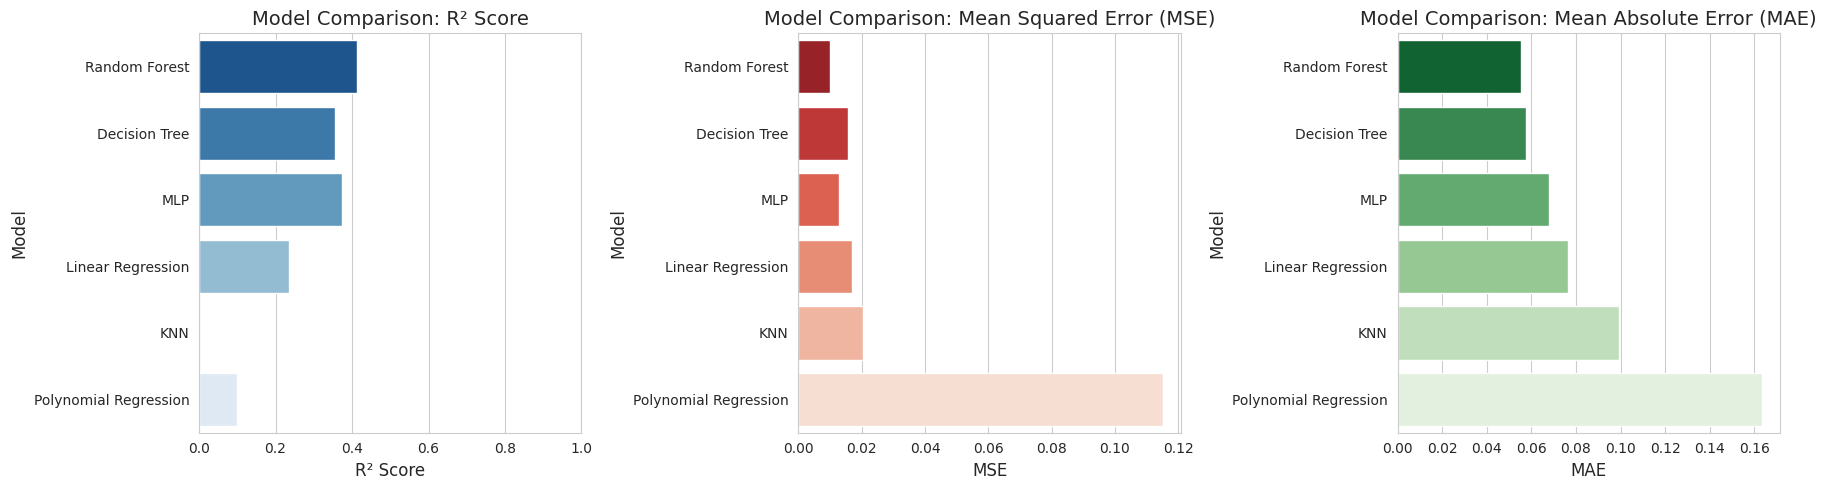

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

# Set figure size
plt.figure(figsize=(16, 6))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# **Bar Plot for R² Score**
sns.barplot(x="R² Score", y="Model", data=df_results, palette="Blues_r", ax=axes[0])
axes[0].set_title("Model Comparison: R² Score", fontsize=14)
axes[0].set_xlabel("R² Score", fontsize=12)
axes[0].set_ylabel("Model", fontsize=12)
axes[0].set_xlim(0, 1)  # R² Score typically ranges from 0 to 1

# **Bar Plot for MSE**
sns.barplot(x="MSE", y="Model", data=df_results, palette="Reds_r", ax=axes[1])
axes[1].set_title("Model Comparison: Mean Squared Error (MSE)", fontsize=14)
axes[1].set_xlabel("MSE", fontsize=12)
axes[1].set_ylabel("Model", fontsize=12)

# **Bar Plot for MAE**
sns.barplot(x="MAE", y="Model", data=df_results, palette="Greens_r", ax=axes[2])
axes[2].set_title("Model Comparison: Mean Absolute Error (MAE)", fontsize=14)
axes[2].set_xlabel("MAE", fontsize=12)
axes[2].set_ylabel("Model", fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


# **Garment Workers' Productivity Prediction: Model Evaluation & Insights**  

**Purpose of the Work**  

The objective of this project is to develop and evaluate **machine learning models** for predicting  
**garment workers' productivity** based on various factors such as **working hours, incentives, efficiency, and workload**.  

---

**1. Understanding Model Performance**  
- Assess different regression models using **R² Score, Mean Squared Error (MSE), and Mean Absolute Error (MAE)**  
  to determine which model best predicts productivity.

- Identify whether models **overfit, underfit, or generalize well** to unseen data.  
- Determine if a **linear or non-linear relationship** exists between input features and worker productivity.  

---

**2. Comparing Machine Learning Models**  
The following models were evaluated:  
- **Random Forest Regressor**  

- **Decision Tree Regressor**  
- **Multi-Layer Perceptron (MLP) (Neural Network)**  
- **Linear Regression**  
- **K-Nearest Neighbors (KNN)**  
- **Polynomial Regression**  

By comparing their performance, we can identify the best approach for predicting garment worker productivity.  

---

**3. Identifying the Best Model**  
- The best model should have **the highest R² Score** and **the lowest MSE and MAE**.  

- Poorly performing models may indicate **overfitting, underfitting, or poor feature selection**.  
- The findings help refine model selection and improve productivity forecasting.  

---

**Key Insights from the Results**  

**Best Model: Random Forest Regressor**  
- **Highest R² Score**, indicating that it explains the highest variance in worker productivity.  

- **Lowest MSE and MAE**, meaning it makes the most accurate predictions.  
- Works well because **Random Forest captures non-linear relationships** and reduces overfitting through ensemble learning.  

**Decision Tree & MLP Also Performed Well**  
- **Decision Tree and MLP** had relatively good R² scores and low errors.  

- **Decision Tree captures interactions well** but can overfit if not properly tuned.  
- **MLP (Neural Network) learns complex patterns**, but its performance depends on hyperparameter tuning.  

**Polynomial Regression Performed the Worst**  
- **Lowest R² Score, highest MSE and MAE**, meaning it fails to generalize well.  

- Likely suffers from **overfitting**, as polynomial regression tends to fit training data too closely but fails on unseen data.  

**Linear Models (Linear Regression & KNN) Showed Weak Performance**  
- **Linear Regression has a low R² Score**, indicating it struggles to capture productivity trends.  

- **KNN also underperforms**, suggesting that worker productivity is not best predicted by local neighbor-based techniques.  

---

**Conclusion**  

- **Random Forest is the best-performing model**, suggesting that garment worker productivity is **influenced by multiple interacting factors rather than a simple linear relationship**.  

- **Decision Tree and MLP show promise**, but they may require careful hyperparameter tuning to avoid overfitting.  
- **Polynomial Regression performed the worst**, proving that adding complexity doesn’t always improve accuracy.  
- **Linear Regression and KNN struggled**, confirming that a more advanced, non-linear approach is necessary for accurate predictions.  

This analysis helps in **choosing the right model** for productivity forecasting, allowing better  
**workforce planning and efficiency improvements** in the garment industry.  


# **What These Tasks Can Be Used For**  

---

**1. Enhancing Productivity Forecasting**  
- By developing accurate productivity prediction models, this project helps **factory managers, HR departments, and supervisors**  
  optimize worker schedules and incentives.  

- The best-performing model (Random Forest) provides **reliable productivity estimates** based on historical data,  
  allowing better workforce management.  
- Helps **reduce inefficiencies, improve labor allocation, and boost overall production output**.  

---

**2. Data-Driven Decision Making**  

- Machine learning models identify key **factors influencing worker productivity** (e.g., shift hours, incentives, workload).  

- Insights from **feature importance analysis** can help businesses **refine HR policies and incentive structures**.  
- Garment factories can use these models to **forecast workforce performance and optimize operations accordingly**.  

---

**3. Improving Workforce Planning**  
- **Manufacturing and textile industries** can integrate these models to **optimize staffing levels** and minimize downtime.  

- Predictive analytics can help **assign workers to tasks based on expected performance**, improving efficiency.  
- Future improvements, such as **real-time monitoring**, could dynamically adjust staffing based on productivity trends.  

---

**4. Increasing Operational Efficiency**  
- A data-driven approach helps **identify bottlenecks and inefficiencies** in production workflows.  

- Managers can use productivity models to justify **process changes and resource allocation**, ensuring smoother operations.  
- Reducing idle time and optimizing labor distribution can lead to **higher production output with lower costs**.  

---

**5. Automating Performance Evaluation**  
- The trained models can be **integrated into HR systems** to provide automated productivity insights.  

- **Factory supervisors and HR professionals** can assess worker performance **objectively**, reducing bias in evaluations.  
- Scaling this system for **real-time performance tracking** can help businesses identify **low productivity periods** and take corrective actions.  

---

**6. Optimizing Business Strategies for Factories**  
- Understanding **productivity trends and workload patterns** can help factories make **better scheduling and staffing decisions**.  

- Historical data can be leveraged to predict **peak production periods** and adjust work shifts dynamically.  
- Factories can **align production targets** with predicted workforce efficiency, reducing labor costs and maximizing output.  

---

**7. Improving Model Interpretability and Trust**  
- Feature analysis ensures that the model’s **productivity predictions are transparent**, increasing trust among managers.  

- **Data-driven insights** can be used to justify scheduling decisions and performance-based incentives, improving adoption in corporate settings.  

---

**8. Scaling to Other Applications**  
- The same modeling techniques can be **extended to other industries**, such as logistics, healthcare, or retail workforce management.  

- **Financial services** can use similar models for **labor cost predictions and workforce optimization**.  

---

**Conclusion**  
The insights from this project are valuable for **factory managers, HR professionals, production planners, and corporate executives**.  
By leveraging machine learning for **productivity forecasting, workforce optimization, and operational efficiency**,  
this approach can significantly enhance decision-making in labor-intensive industries.  


# Feature Importance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Train a Random Forest model using the best hyperparameters found for temporal data
best_rfr_temporal = RandomForestRegressor(
    n_estimators=300, min_samples_split=10, min_samples_leaf=1,
    max_features='sqrt', max_depth=40, bootstrap=False, random_state=42
)
best_rfr_temporal.fit(x_train_temporal, y_train_temporal)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      min_samples_split=10, n_estimators=300, random_state=42)

In [ ]:
# Train a Random Forest model for lagged data
best_rfr_lagged = RandomForestRegressor(
    n_estimators=300, min_samples_split=2, min_samples_leaf=1,
    max_features='log2', max_depth=10, bootstrap=False, random_state=42
)
best_rfr_lagged.fit(x_train_temporal_lagged, y_train_temporal_lagged)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='log2',
                      n_estimators=300, random_state=42)

In [ ]:
# Extract feature importance from Random Forest
rf_feature_importance_temporal = pd.DataFrame({
    'Feature': x_train_temporal.columns,
    'Importance': best_rfr_temporal.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [ ]:
rf_feature_importance_lagged = pd.DataFrame({
    'Feature': x_train_temporal_lagged.columns,
    'Importance': best_rfr_lagged.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [ ]:
# Train a Decision Tree model for comparison for temporal data
dt_temporal = DecisionTreeRegressor(
    max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='log2', random_state=42
)
dt_temporal.fit(x_train_temporal, y_train_temporal)

DecisionTreeRegressor(max_depth=10, max_features='log2', random_state=42)

In [ ]:
# Train a Decision Tree model for lagged data
dt_lagged = DecisionTreeRegressor(
    max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='log2', random_state=42
)
dt_lagged.fit(x_train_temporal_lagged, y_train_temporal_lagged)

DecisionTreeRegressor(max_depth=10, max_features='log2', random_state=42)

In [ ]:
# Extract feature importance from Decision Tree
dt_feature_importance_temporal = pd.DataFrame({
    'Feature': x_train_temporal.columns,
    'Importance': dt_temporal.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [ ]:
dt_feature_importance_lagged = pd.DataFrame({
    'Feature': x_train_temporal_lagged.columns,
    'Importance': dt_lagged.feature_importances_
}).sort_values(by='Importance', ascending=False)

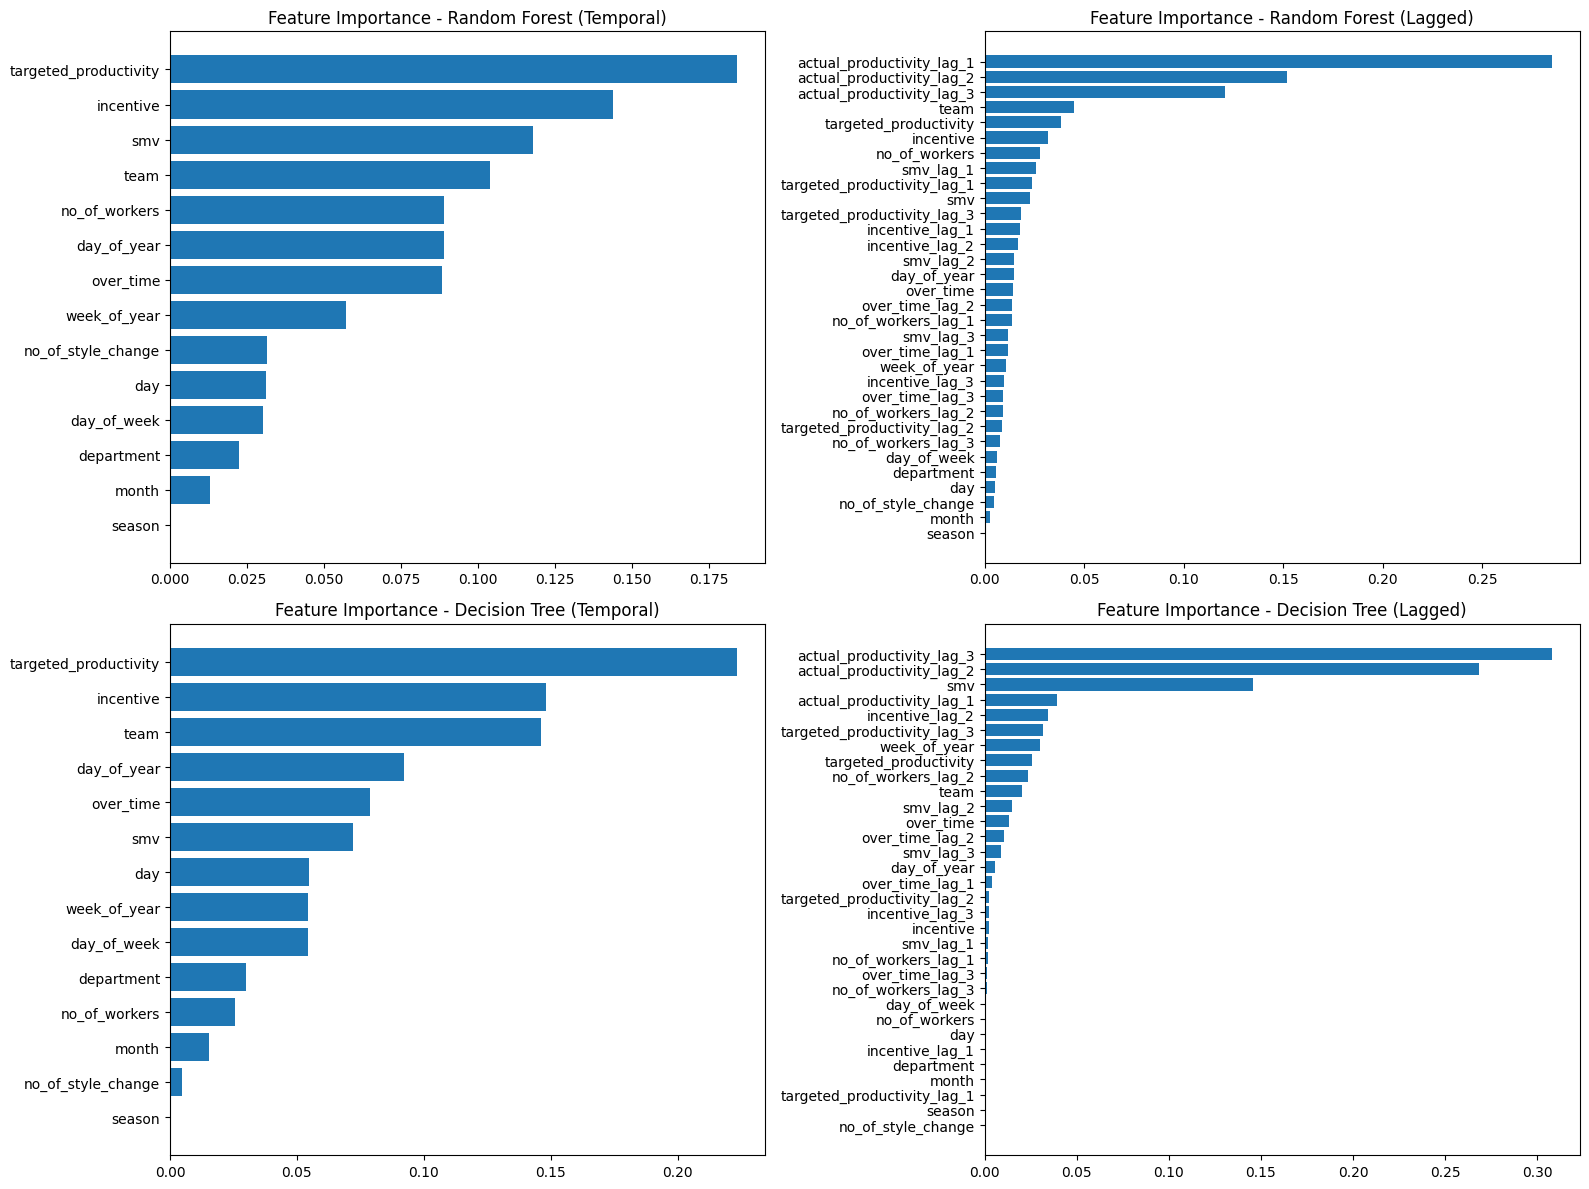

In [ ]:
# Visualize Feature Importance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].barh(rf_feature_importance_temporal['Feature'], rf_feature_importance_temporal['Importance'])
axes[0, 0].set_title('Feature Importance - Random Forest (Temporal)')
axes[0, 0].invert_yaxis()

axes[0, 1].barh(rf_feature_importance_lagged['Feature'], rf_feature_importance_lagged['Importance'])
axes[0, 1].set_title('Feature Importance - Random Forest (Lagged)')
axes[0, 1].invert_yaxis()

axes[1, 0].barh(dt_feature_importance_temporal['Feature'], dt_feature_importance_temporal['Importance'])
axes[1, 0].set_title('Feature Importance - Decision Tree (Temporal)')
axes[1, 0].invert_yaxis()

axes[1, 1].barh(dt_feature_importance_lagged['Feature'], dt_feature_importance_lagged['Importance'])
axes[1, 1].set_title('Feature Importance - Decision Tree (Lagged)')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
# Display feature importance results
print("Random Forest Feature Importance (Temporal):\n", rf_feature_importance_temporal)
print("\nRandom Forest Feature Importance (Lagged):\n", rf_feature_importance_lagged)
print("\nDecision Tree Feature Importance (Temporal):\n", dt_feature_importance_temporal)
print("\nDecision Tree Feature Importance (Lagged):\n", dt_feature_importance_lagged)

Random Forest Feature Importance (Temporal):
                   Feature  Importance
3   targeted_productivity    0.183986
6               incentive    0.143677
4                     smv    0.117634
2                    team    0.103957
8           no_of_workers    0.088897
11            day_of_year    0.088817
5               over_time    0.088260
12           week_of_year    0.056967
7      no_of_style_change    0.031450
1                     day    0.031144
10            day_of_week    0.030064
0              department    0.022307
9                   month    0.012841
13                 season    0.000000

Random Forest Feature Importance (Lagged):
                         Feature  Importance
14    actual_productivity_lag_1    0.284829
15    actual_productivity_lag_2    0.151868
16    actual_productivity_lag_3    0.120996
2                          team    0.045129
3         targeted_productivity    0.038549
6                     incentive    0.031807
8                 no_of_workers